In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
airports = pd.read_csv('C:\BTS_Master\Data_Driven\second/airports.csv')

In [3]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [4]:
airlines = pd.read_csv('C:\BTS_Master\Data_Driven\second/airlines.csv')

In [5]:
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [6]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
IATA_CODE    322 non-null object
AIRPORT      322 non-null object
CITY         322 non-null object
STATE        322 non-null object
COUNTRY      322 non-null object
LATITUDE     319 non-null float64
LONGITUDE    319 non-null float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [7]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
IATA_CODE    14 non-null object
AIRLINE      14 non-null object
dtypes: object(2)
memory usage: 304.0+ bytes


### These two are only the tables of the airlines and airports, the most important data is in the file flights

In [8]:
flights = pd.read_csv('C:\BTS_Master\Data_Driven\second/flights.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
flights.shape

(5819079, 31)

#### Almost 6 milions rows of data and 31 columns

In [11]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
YEAR                   int64
MONTH                  int64
DAY                    int64
DAY_OF_WEEK            int64
AIRLINE                object
FLIGHT_NUMBER          int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               int64
CANCELLED              int64
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT

In [12]:
flights.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,5819079.0,2015.000000,0.000000,2015.0,2015.0,2015.0,2015.0,2015.0
MONTH,5819079.0,6.524085,3.405137,1.0,4.0,7.0,9.0,12.0
DAY,5819079.0,15.704594,8.783425,1.0,8.0,16.0,23.0,31.0
DAY_OF_WEEK,5819079.0,3.926941,1.988845,1.0,2.0,4.0,6.0,7.0
FLIGHT_NUMBER,5819079.0,2173.092742,1757.063999,1.0,730.0,1690.0,3230.0,9855.0
SCHEDULED_DEPARTURE,5819079.0,1329.602470,483.751821,1.0,917.0,1325.0,1730.0,2359.0
DEPARTURE_TIME,5732926.0,1335.204439,496.423260,1.0,921.0,1330.0,1740.0,2400.0
DEPARTURE_DELAY,5732926.0,9.370158,37.080942,-82.0,-5.0,-2.0,7.0,1988.0
TAXI_OUT,5730032.0,16.071662,8.895574,1.0,11.0,14.0,19.0,225.0
WHEELS_OFF,5730032.0,1357.170841,498.009356,1.0,935.0,1343.0,1754.0,2400.0


#### We can see some interesting values here, we have negative departure and arrival delays, the flights started and/or arrived earlier than scheduled. It isn't that strange that a flight starts earlier than planned but the value of more than 80 minutes negative delay is a bit weird, they arrived almost 1,5 hours earlier than sheduled.

#### we can also see some skewness on the distribuition of the delays, we have positive averages but negative medians. And we can also see what seems to be some outliers, 75% of the flights have a arrival delay of 8 minutes or less but then we have a maximum value  of 1971 minutes! We will look further into this

### And we can see that we have some missing data, in some columns we have a lot of missing data, lets look into that first, looking at the columns with missing data:

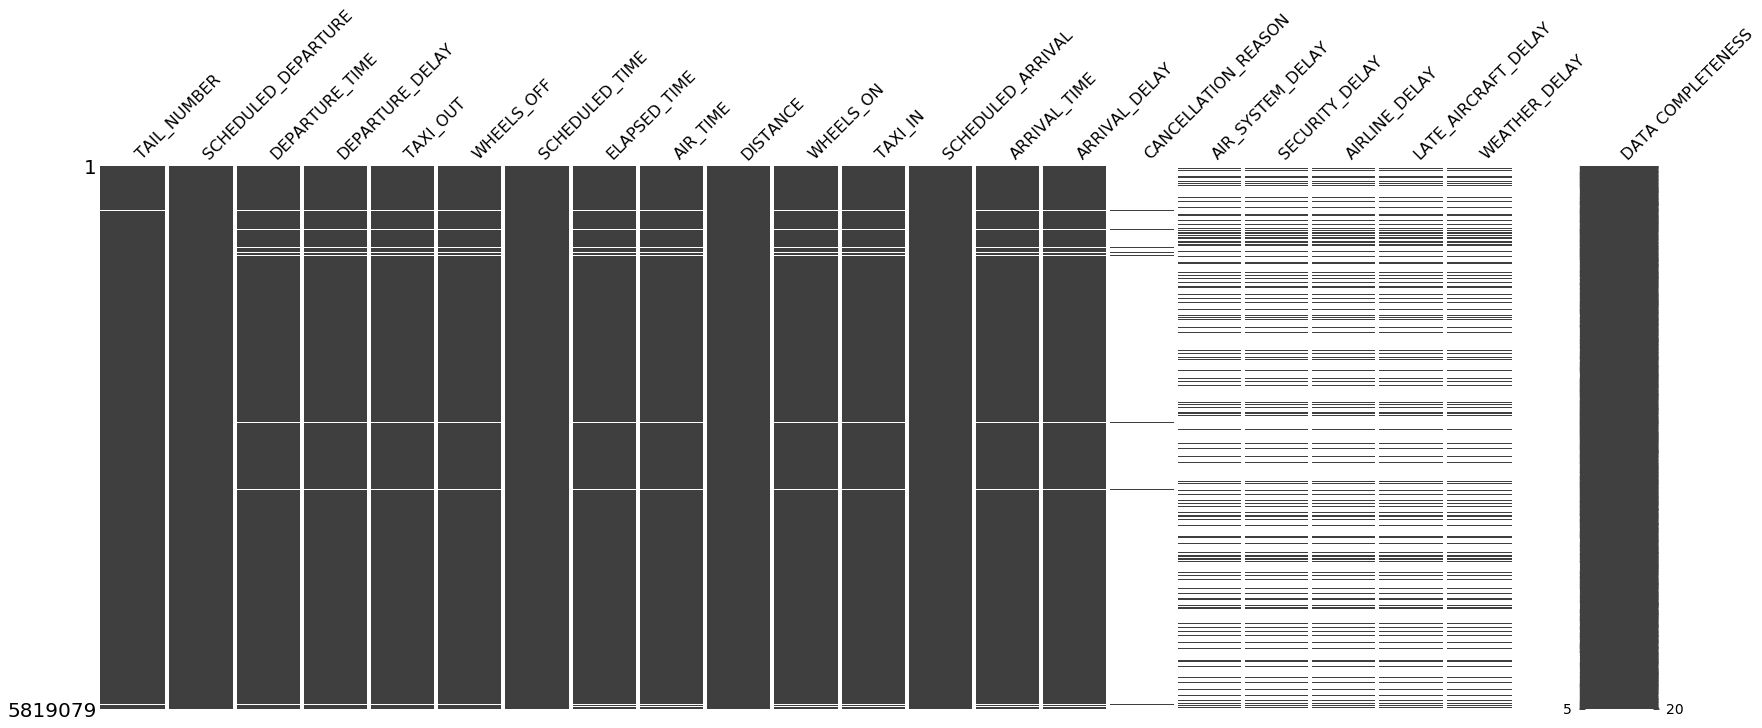

In [13]:
msno.matrix(flights.drop(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 
                          'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DIVERTED', 'CANCELLED'], axis=1), labels=True)

####  1 - The columns  air_system_delay, security_delay, airline_delay, late_aircraft_delay and weather_delay are columns that give us more details about the reason of the arrival delay. This kind of information is only available after we know there was a delay, that means they are not usefull to predict delays, they will only make our model fail when trying to predict unseen data. I'm going to drop them.

#### 2 - We are missing the most data in the column cancelation reason, that's because we only have values when the flights were canceled. Since the objective of this data analysis is to predict the flight delays and not the canceled ones we are going to drop that column. 

#### 3 - And finally we can see that when we have some more missing values. But the rows with missing values are missing values in almost every column, thats because those are the canceled flights, we can above that those rows are the same who have a canceled reason. We can drop those rows too, they are canceled, not delayed.


In [14]:
flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 
         'WEATHER_DELAY', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']]

,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DEPARTURE_DELAY,ARRIVAL_DELAY
0,NaN,NaN,NaN,NaN,NaN,-11.0,-22.0
1,NaN,NaN,NaN,NaN,NaN,-8.0,-9.0
2,NaN,NaN,NaN,NaN,NaN,-2.0,5.0
3,NaN,NaN,NaN,NaN,NaN,-5.0,-9.0
4,NaN,NaN,NaN,NaN,NaN,-1.0,-21.0
5,NaN,NaN,NaN,NaN,NaN,-5.0,8.0
6,NaN,NaN,NaN,NaN,NaN,-6.0,-17.0
7,NaN,NaN,NaN,NaN,NaN,14.0,-10.0
8,NaN,NaN,NaN,NaN,NaN,-11.0,-13.0
9,NaN,NaN,NaN,NaN,NaN,3.0,-15.0


### looking at the data we can see that the point 1 is correct, those columns are all about the delays at arrival, thats our target variable, we cannot use this columns to predict the arrival delays, dropping them:

In [15]:
drop_col = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

In [16]:
flights2 = flights.drop(drop_col, axis=1)

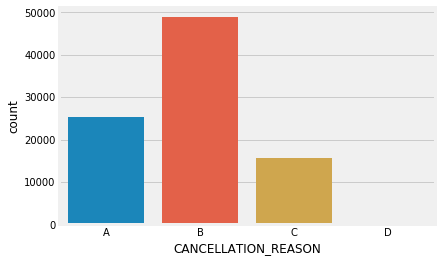

In [17]:
sns.countplot(flights.CANCELLATION_REASON)

In [18]:
sum(flights.CANCELLATION_REASON.value_counts())

89884

### we are going to drop those rows of point 3, the cancelled flights, 90k in a total of almost 6 millions is a very low %:

In [19]:
flights2.dropna(inplace=True)

In [20]:
flights2.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,5714008.0,2015.000000,0.000000,2015.0,2015.0,2015.0,2015.0,2015.0
MONTH,5714008.0,6.547799,3.397421,1.0,4.0,7.0,9.0,12.0
DAY,5714008.0,15.707591,8.774394,1.0,8.0,16.0,23.0,31.0
DAY_OF_WEEK,5714008.0,3.932643,1.985967,1.0,2.0,4.0,6.0,7.0
FLIGHT_NUMBER,5714008.0,2164.383547,1754.706022,1.0,728.0,1681.0,3211.0,9320.0
SCHEDULED_DEPARTURE,5714008.0,1328.907421,483.525058,1.0,916.0,1325.0,1730.0,2359.0
DEPARTURE_TIME,5714008.0,1335.065627,496.419817,1.0,921.0,1330.0,1740.0,2400.0
DEPARTURE_DELAY,5714008.0,9.294842,36.889724,-82.0,-5.0,-2.0,7.0,1988.0
TAXI_OUT,5714008.0,16.065498,8.882449,1.0,11.0,14.0,19.0,225.0
WHEELS_OFF,5714008.0,1357.099048,498.023745,1.0,935.0,1343.0,1754.0,2400.0


In [21]:
flights2.shape[0] / flights.shape[0] *100

98.1943706211928

### We still have 98% of the original data and now without missing values

## Looking at the distribuition of our target:

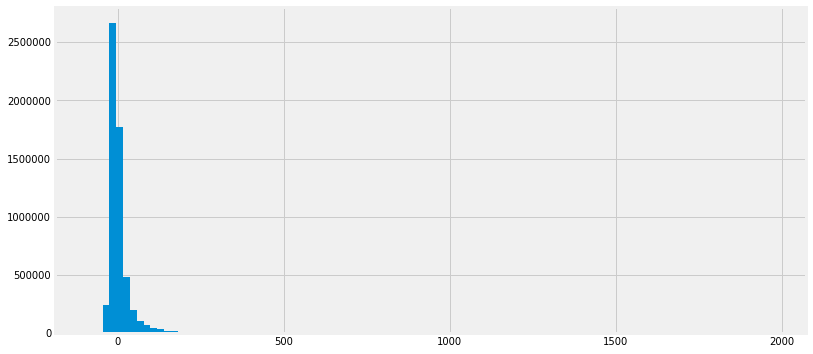

In [22]:
plt.figure(figsize=(12,6))
flights2['ARRIVAL_DELAY'].hist(bins=100);

### We have outliers that make this impossible to see correctly, lets see only the flights with delays of less than 120 minutes, two hours, this is approximately equivalent of 3 standard deviations:

In [23]:
print('Average of Arrival Delay: {}'.format(flights2['ARRIVAL_DELAY'].mean()))
print()
print('Median of Arrival Delay: {}'.format(flights2['ARRIVAL_DELAY'].median()))
print()
print('Standard Deviation of Arrival Delay: {}'.format(flights2['ARRIVAL_DELAY'].std()))

Average of Arrival Delay: 4.407057357987598

Median of Arrival Delay: -5.0

Standard Deviation of Arrival Delay: 39.271297093929846


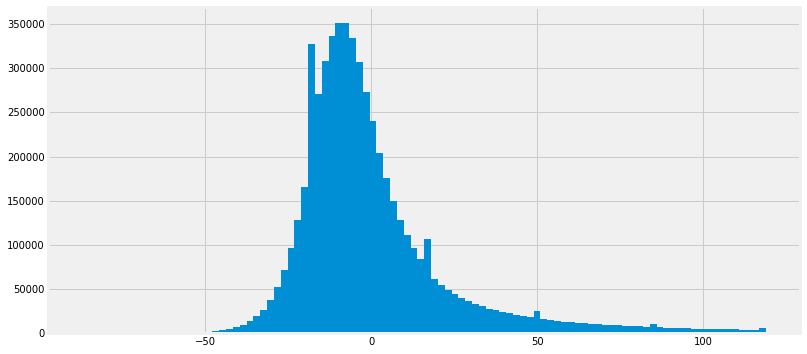

In [24]:
flights3 = flights2[flights2['ARRIVAL_DELAY'] < 120]

plt.figure(figsize=(12,6))
flights3['ARRIVAL_DELAY'].hist(bins=100);

#### we can see again the skewness of the distribuition mentioned above, most flights have a small negative delay, that gives us the negative median, but we have some flights with high delays, that give us the positive value to the mean

### and the distribuition of the departure delays:

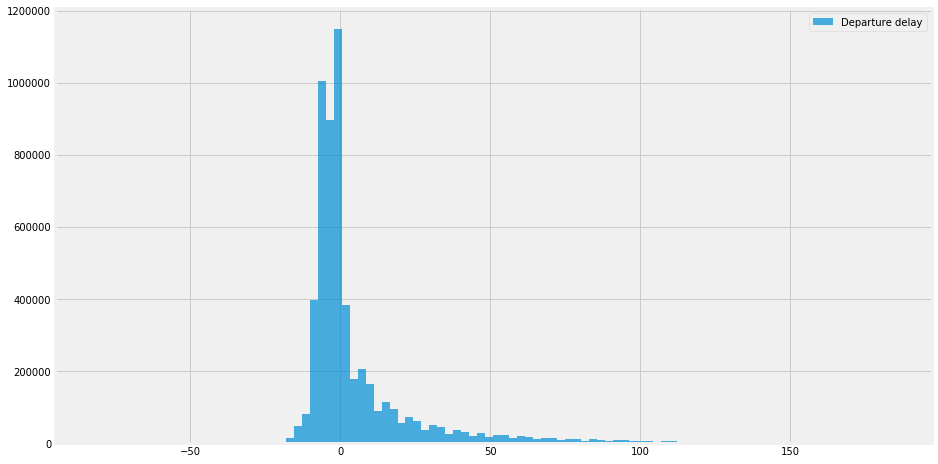

In [25]:
plt.figure(figsize=(14,8))
flights3['DEPARTURE_DELAY'].hist(bins=100, alpha=0.7, label='Departure delay')
# flights3['ARRIVAL_DELAY'].hist(bins=100, alpha=0.7, label= 'Arrival delay')
plt.legend();

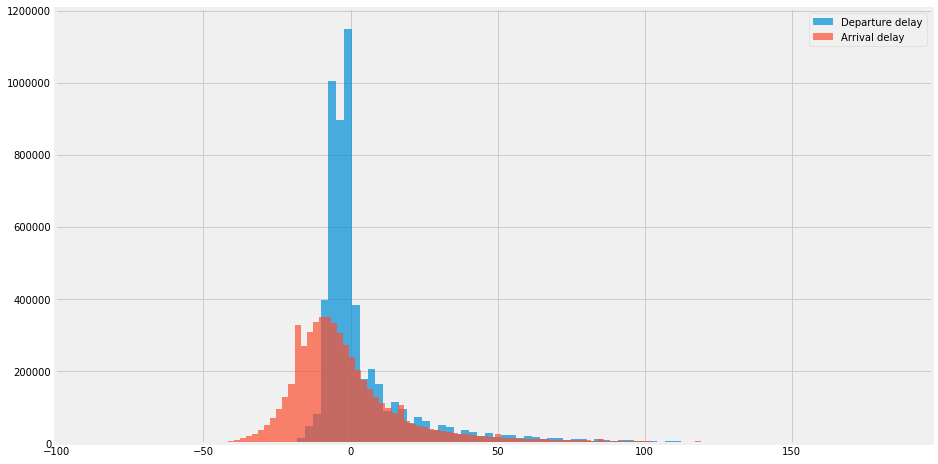

In [26]:
plt.figure(figsize=(14,8))
flights3['DEPARTURE_DELAY'].hist(bins=100, alpha=0.7, label='Departure delay')
flights3['ARRIVAL_DELAY'].hist(bins=100, alpha=0.7, label= 'Arrival delay')
plt.legend();

In [27]:
flights2[flights2['ARRIVAL_DELAY'] > 120].shape[0] / flights2.shape[0] * 100

2.0024473189397005

#### the outliers in the dataset, the flights with high delays, more than 2 hours, represent 2% of the flights, we are going to ignore those

### Do we have different distribuitions of the delays depending on the day of the week, or the month?

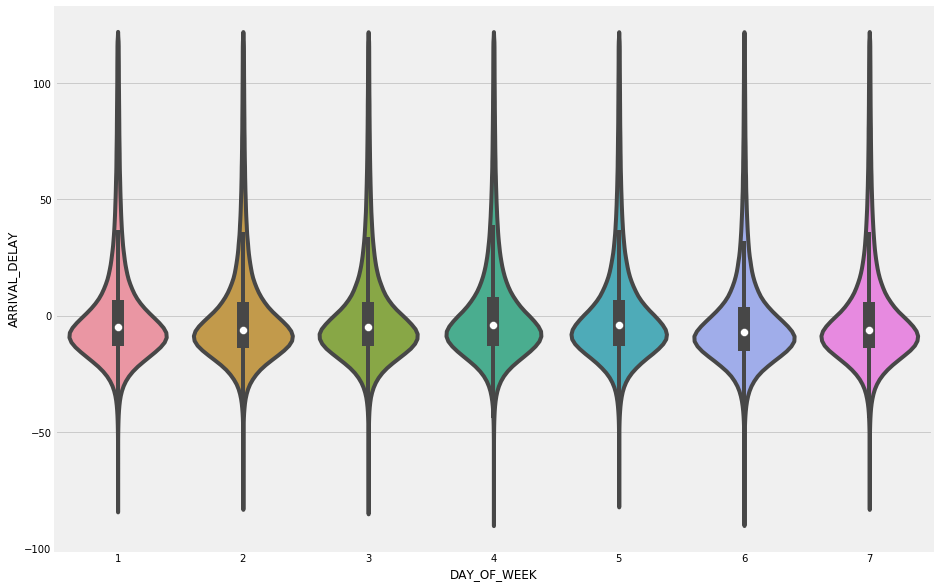

In [28]:
plt.figure(figsize=(14,10))
sns.violinplot(data=flights3, x='DAY_OF_WEEK', y='ARRIVAL_DELAY');

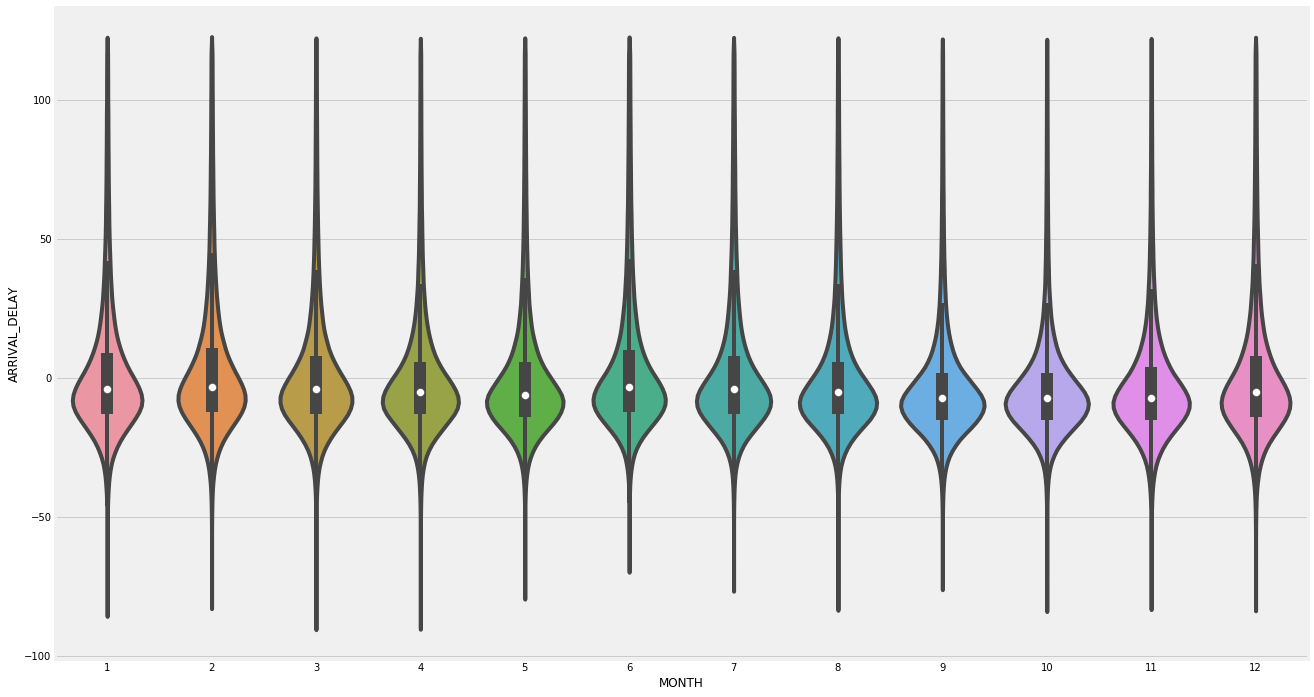

In [29]:
plt.figure(figsize=(20,12))
sns.violinplot(data=flights3, x='MONTH', y='ARRIVAL_DELAY');

#### The day of the week, or the month, don't seem to have an effect on the delay, the average is always around the same value and the distribuition of the delays is also very similar

### We probably still have too many variables and some of those with high correlation between them, we can plot a heatmat of correlations and decide wich ones we should drop and wich ones we should look further into

In [30]:
flights3.corr()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,0.001686,-0.009436,-0.019651,0.000014,-0.003230,-0.032233,-0.009908,-0.004181,...,0.002399,0.003322,0.010472,-0.008972,0.004082,-0.010149,-0.009228,-0.053355,NaN,NaN
DAY,NaN,0.001686,1.000000,0.001842,0.003494,-0.002025,-0.002813,-0.006150,-0.003097,-0.003372,...,0.001375,0.001935,0.002944,-0.004157,-0.002142,-0.004062,-0.004125,-0.010177,NaN,NaN
DAY_OF_WEEK,NaN,-0.009436,0.001842,1.000000,0.015732,0.007941,0.006560,-0.008669,-0.020320,0.005023,...,0.011628,0.014168,0.015728,0.006253,0.002066,0.007271,0.006272,-0.017522,NaN,NaN
FLIGHT_NUMBER,NaN,-0.019651,0.003494,0.015732,1.000000,-0.005693,-0.002559,-0.023528,0.052578,0.004271,...,-0.306328,-0.319030,-0.329168,-0.009123,-0.021190,-0.013861,-0.005890,0.023588,NaN,NaN
SCHEDULED_DEPARTURE,NaN,0.000014,-0.002025,0.007941,-0.005693,1.000000,0.978658,0.164618,0.004207,0.954992,...,-0.018551,-0.015976,-0.008906,0.684494,-0.047811,0.705046,0.658399,0.136761,NaN,NaN
DEPARTURE_TIME,NaN,-0.003230,-0.002813,0.006560,-0.002559,0.978658,1.000000,0.213945,0.006321,0.974721,...,-0.023774,-0.021563,-0.016044,0.696501,-0.048113,0.715722,0.670019,0.179714,NaN,NaN
DEPARTURE_DELAY,NaN,-0.032233,-0.006150,-0.008669,-0.023528,0.164618,0.213945,1.000000,0.028676,0.208118,...,0.031595,0.031061,0.035285,0.118080,-0.026809,0.139321,0.108484,0.852710,NaN,NaN
TAXI_OUT,NaN,-0.009908,-0.003097,-0.020320,0.052578,0.004207,0.006321,0.028676,1.000000,0.032259,...,0.202986,0.091175,0.076701,0.032077,-0.003158,0.022121,0.029709,0.286913,NaN,NaN
WHEELS_OFF,NaN,-0.004181,-0.003372,0.005023,0.004271,0.954992,0.974721,0.208118,0.032259,1.000000,...,-0.029326,-0.030412,-0.027543,0.713796,-0.046704,0.729483,0.687200,0.181859,NaN,NaN


### The year is always the same, the data is from 2015, we can drop that column. Canceled are not delays, we can drop that too

In [31]:
flights3 = flights3.drop(['CANCELLED', 'YEAR'], axis=1)

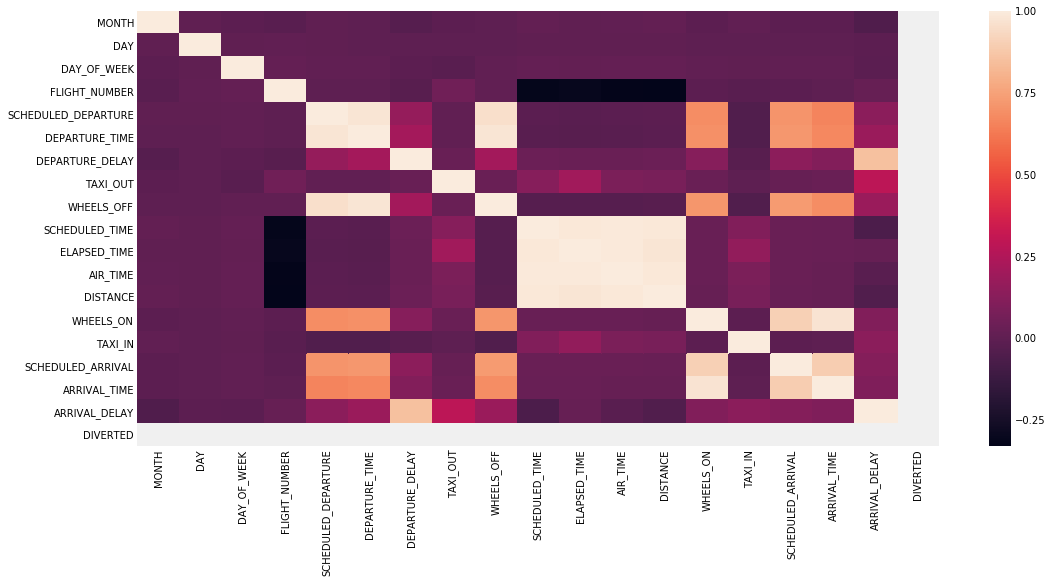

In [32]:
plt.figure(figsize=(16,8))
sns.heatmap(flights3.corr());

### The variables wheels_off, departure_time and scheduled_departure are highly correlated, very close to 1, we need to keep only one of those.

### The same happens with wheels_on, scheduled_arrival and arrival_time.

### Scheduled_time, elapsed_time, air_time and distance have the same problem, high correlation. Will drop air_time and keep distance.

In [33]:
to_drop = ['WHEELS_OFF', 'DEPARTURE_TIME', 'WHEELS_ON', 'ARRIVAL_TIME', 'AIR_TIME']

flights3.drop(to_drop, axis=1, inplace=True)

In [34]:
flights3['DIVERTED'].value_counts()

0    5597752
Name: DIVERTED, dtype: int64

### We no longer have diverted flights, better to drop that column too

### We still have a high correlation between the scheduled time and elapsed time. In this case i'm going to use those two variables to create a new one and then drop them.
### These variables give us how much time the flight was scheduled to take and how much time it actually took. The new variable will give us how much time was gained during the flight, if it was slower of faster than scheduled.

In [35]:
flights3['GAINED_TIME'] = flights3['SCHEDULED_TIME'] - flights3['ELAPSED_TIME']

In [36]:
flights3.drop(['SCHEDULED_TIME', 'ELAPSED_TIME', 'DIVERTED'], axis=1, inplace=True)

In [37]:
flights3.corr()

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,TAXI_OUT,DISTANCE,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,GAINED_TIME
MONTH,1.000000,0.001686,-0.009436,-0.019651,0.000014,-0.032233,-0.009908,0.010472,0.004082,-0.010149,-0.053355,0.048313
DAY,0.001686,1.000000,0.001842,0.003494,-0.002025,-0.006150,-0.003097,0.002944,-0.002142,-0.004062,-0.010177,0.009213
DAY_OF_WEEK,-0.009436,0.001842,1.000000,0.015732,0.007941,-0.008669,-0.020320,0.015728,0.002066,0.007271,-0.017522,0.019063
FLIGHT_NUMBER,-0.019651,0.003494,0.015732,1.000000,-0.005693,-0.023528,0.052578,-0.329168,-0.021190,-0.013861,0.023588,-0.084363
SCHEDULED_DEPARTURE,0.000014,-0.002025,0.007941,-0.005693,1.000000,0.164618,0.004207,-0.008906,-0.047811,0.705046,0.136761,0.012918
DEPARTURE_DELAY,-0.032233,-0.006150,-0.008669,-0.023528,0.164618,1.000000,0.028676,0.035285,-0.026809,0.139321,0.852710,0.036510
TAXI_OUT,-0.009908,-0.003097,-0.020320,0.052578,0.004207,0.028676,1.000000,0.076701,-0.003158,0.022121,0.286913,-0.501046
DISTANCE,0.010472,0.002944,0.015728,-0.329168,-0.008906,0.035285,0.076701,1.000000,0.080439,0.027485,-0.048347,0.151336
TAXI_IN,0.004082,-0.002142,0.002066,-0.021190,-0.047811,-0.026809,-0.003158,0.080439,1.000000,-0.009299,0.133193,-0.299511
SCHEDULED_ARRIVAL,-0.010149,-0.004062,0.007271,-0.013861,0.705046,0.139321,0.022121,0.027485,-0.009299,1.000000,0.115342,0.011702


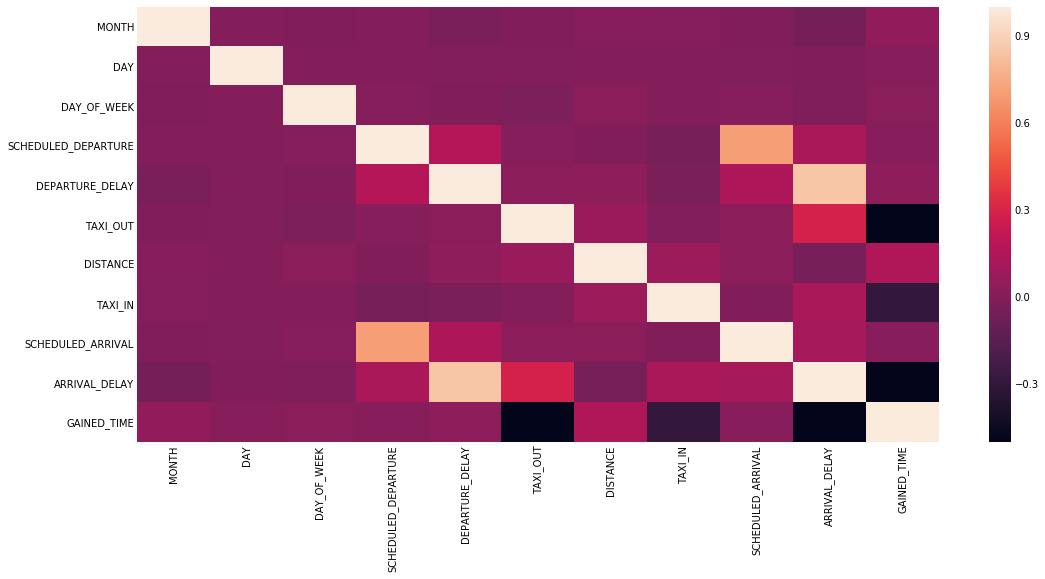

In [38]:
plt.figure(figsize=(16,8))
sns.heatmap(flights3.drop('FLIGHT_NUMBER', axis=1).corr());

#### It's looking better now.  The stronger correlation we can see is between Departure and Arrival delay, that's expected. There is also a strong correlation between scheduled departure and arrival, also not a surprise.

#### There is some correlation between scheduled departure, departure delay and arrival delay, we need to explore further. The same happens with scheduled arrival.

*"The Taxi-out time is defined as the time spent by a flight between its actual off-block time (AOBT) and actual take-off time (ATOT)."*

#### The time gained in the flight is influenced negatively by the taxi out, how long it takes to take off, and by the taxi in, how long it takes to land, it also influences negatively the arrival delay. We don't see a correlation between the time gained and the departure delay or sceduled departure

### The largest influencers of Arrival delay are the Sceduled departure, departure delay, taxi out, taxi in and scheduled arrival, they increase the arrival delay and the gained time, that decreases the delay

## Exploring the influence of the Scheduled departure and arrival in the delays:

In [39]:
def convert_time(value):
    """
    converts the values given to a string in an hour format of 00:00
    """
    value = str(value)
    if len(value) == 4:
        return value[:2] + ':' + value[2:]
    
    elif  len(value) == 3:
        return '0' + value[:1] + ':' + value[1:]
    
    elif  len(value) == 2:
        return '00:' + value
    
    else:
        return '00:0' + value

In [40]:
flights3['departure_time'] = flights3['SCHEDULED_DEPARTURE'].apply(convert_time)

flights3['departure_time'] = pd.to_datetime(flights3['departure_time'])

### The Distribuition of the number of flights during the day:

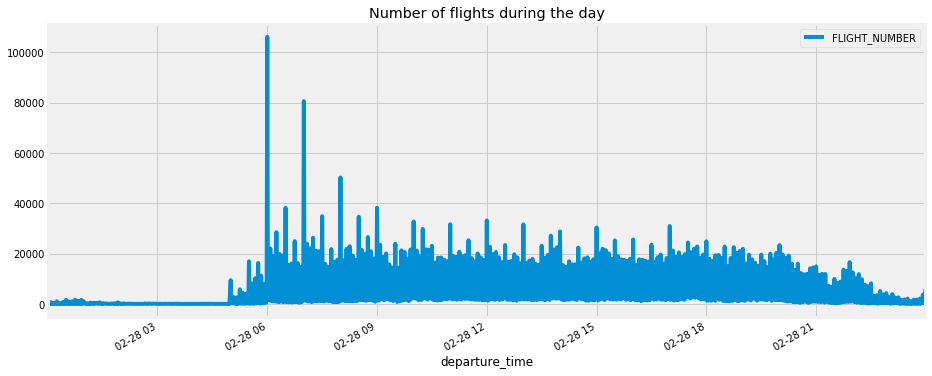

In [41]:
flights3[['departure_time', 'FLIGHT_NUMBER']].groupby('departure_time').count().plot(figsize=(14,6), title='Number of flights during the day');

#### Before 5 or 6a.m. we don't have many flights but then we start having a lot until 10p.m.

### The mean departure delay and arrival delay depending of the scheduled departure:

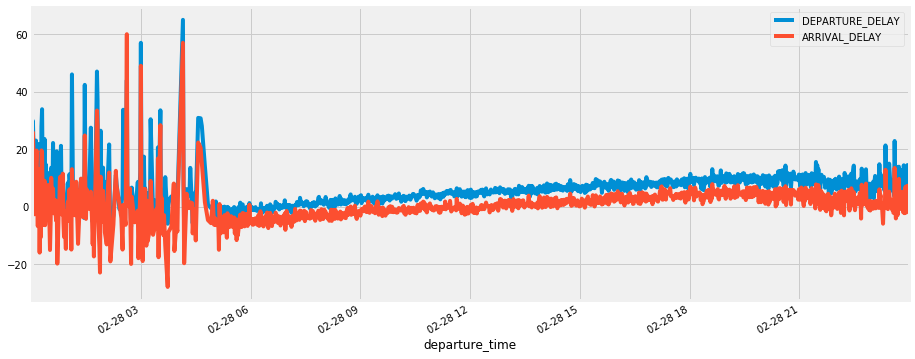

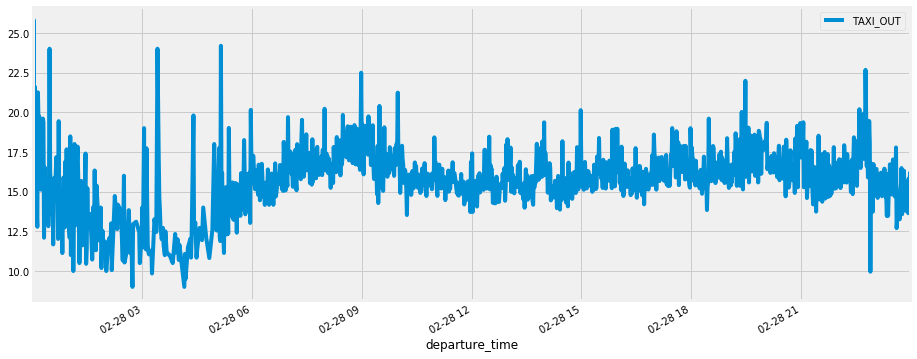

In [42]:
flights3[['departure_time', 'DEPARTURE_DELAY','ARRIVAL_DELAY']].groupby('departure_time').mean().plot(figsize=(14,6))

flights3[['departure_time', 'TAXI_OUT']].groupby('departure_time').mean().plot(figsize=(14,6));

#### In the first few hours of the day we high variance in the delays of the flights, since we have so few flights a delay of only one can make the mean jump a lot. After 5a.m. the variance is a lot more stable.
#### We can see an increase in both the departure and arrival delay as the day progresses
#### The taxi out as a bigger variance.

### Looking at the same information averaging the values per hour:

In [43]:
flights3['departure_hour'] = flights3['departure_time'].apply(lambda x: x.hour)

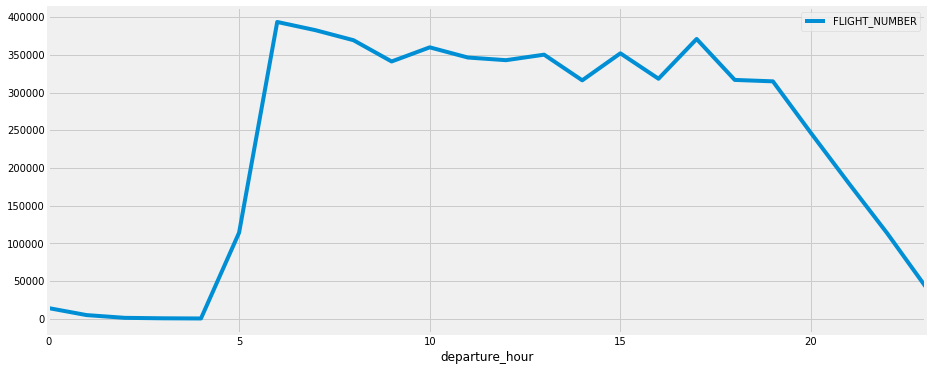

In [44]:
flights3[['departure_hour', 'FLIGHT_NUMBER']].groupby('departure_hour').count().plot(figsize=(14,6));

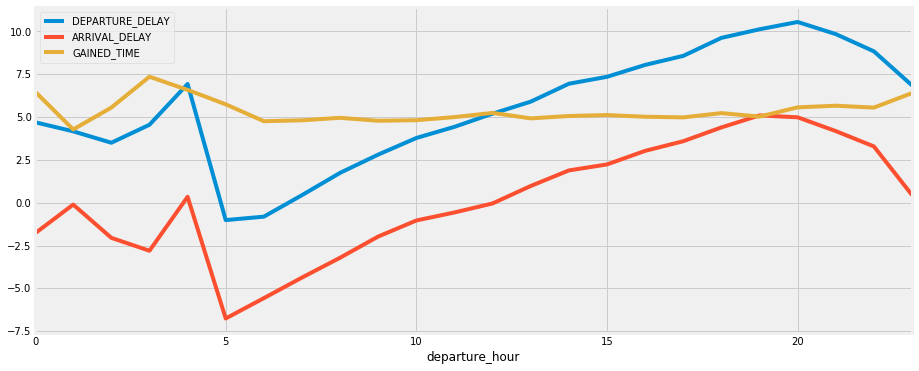

In [45]:
flights3[['departure_hour', 'DEPARTURE_DELAY','ARRIVAL_DELAY', 
          'GAINED_TIME']].groupby('departure_hour').mean().plot(figsize=(14,6));

#### here we can see more clearly the evolution of the number of flights during the day.

#### we can also see better the evolution of the departure delay during the day. It keeps increasing. The gained time doesnt seem to be influenced by the departure time

### The mean departure delay and arrival delay depending of the scheduled arrival:

In [46]:
flights3['arrival_time'] = flights3['SCHEDULED_ARRIVAL'].apply(convert_time)

# converting to datetime gives an error because que have a value of 24:00, datetime only deals with hours until 23:59
# this replaces that value for 23:59
flights3['arrival_time'] = flights3['arrival_time'].apply(lambda x: x.replace('24:00', '23:59'))

In [47]:
flights3['arrival_time'] = pd.to_datetime(flights3['arrival_time'])
flights3['arrival_hour'] = flights3['arrival_time'].apply(lambda x: x.hour)

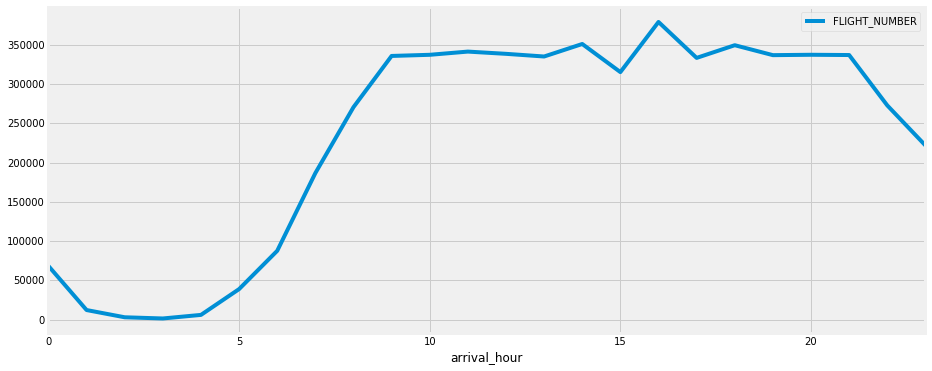

In [48]:
flights3[['arrival_hour', 'FLIGHT_NUMBER']].groupby('arrival_hour').count().plot(figsize=(14,6))

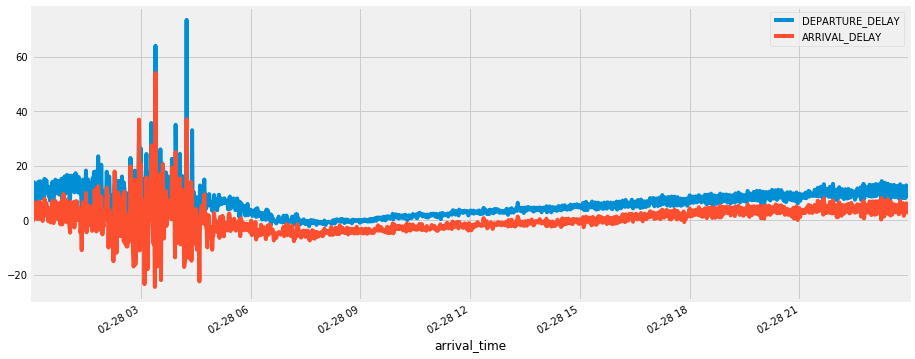

In [49]:
flights3[['arrival_time', 'DEPARTURE_DELAY','ARRIVAL_DELAY']].groupby('arrival_time').mean().plot(figsize=(14,6))

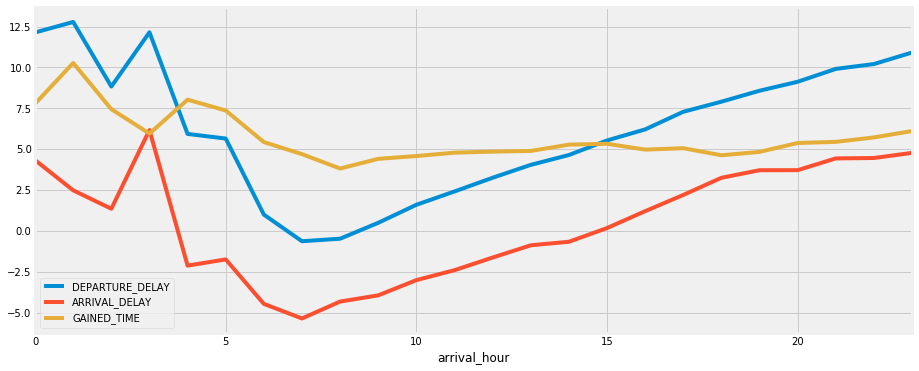

In [50]:
flights3[['arrival_hour', 'DEPARTURE_DELAY','ARRIVAL_DELAY', 
          'GAINED_TIME']].groupby('arrival_hour').mean().plot(figsize=(14,6))

In [51]:
flights['AIR_TIME'].mean()

113.51162809012519

#### the behavior of the delays if we look at the Scheduled arrival is similar with what we saw with the scheduled departure. If we take in consideration that the average flight takes close to two hours we can see that the above graph is almost like the one with the scheduled departure shifted by two hours

### Checking if the taxi out and taxi in are also influenced by the departure time:

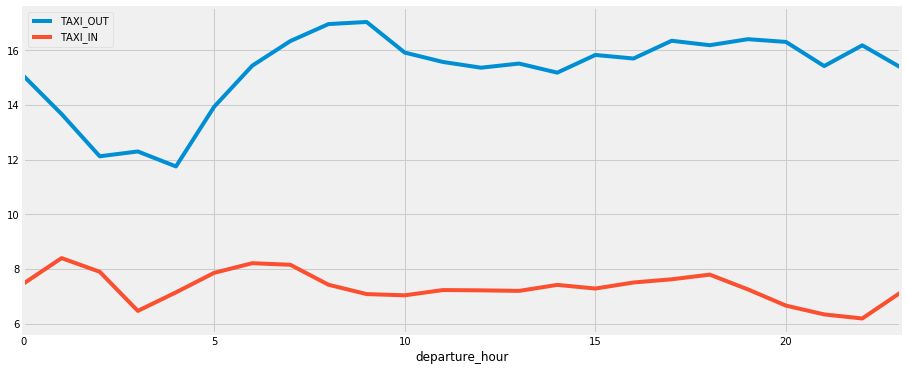

In [52]:
flights3[['departure_hour', 'TAXI_OUT', 'TAXI_IN']].groupby('departure_hour').mean().plot(figsize=(14,6));

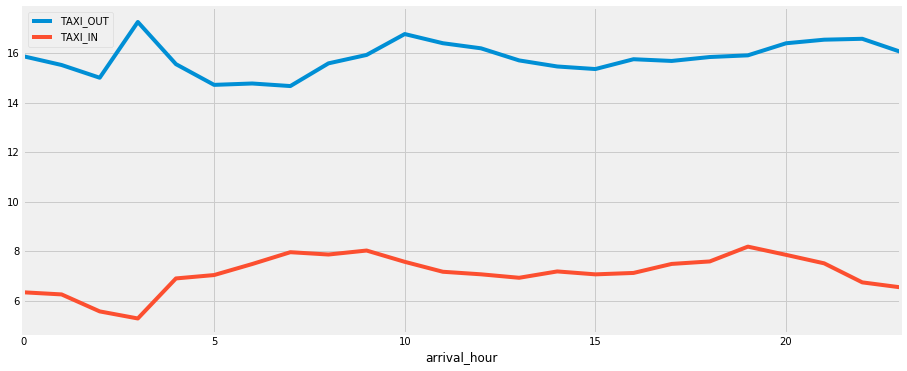

In [53]:
flights3[['arrival_hour', 'TAXI_OUT', 'TAXI_IN']].groupby('arrival_hour').mean().plot(figsize=(14,6));

#### It increases when the number of flights increase in the morning and seems to be stable the rest of the day

### What more can influence the departure delay?

In [54]:
flights3.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_DELAY', 'GAINED_TIME',
       'departure_time', 'departure_hour', 'arrival_time', 'arrival_hour'],
      dtype='object')

### The day of the month?

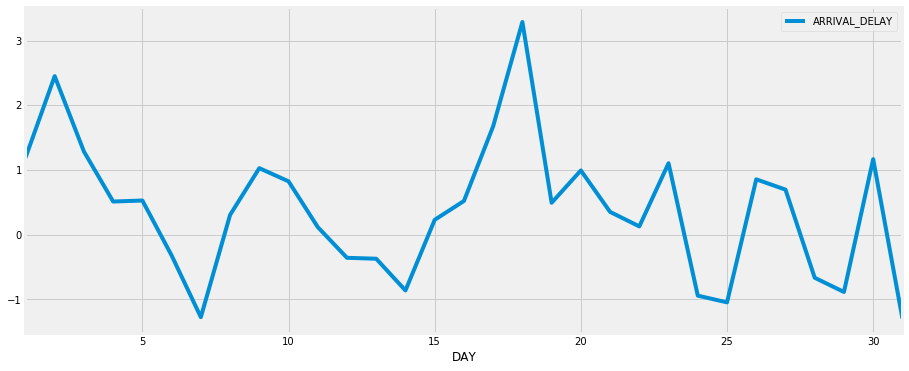

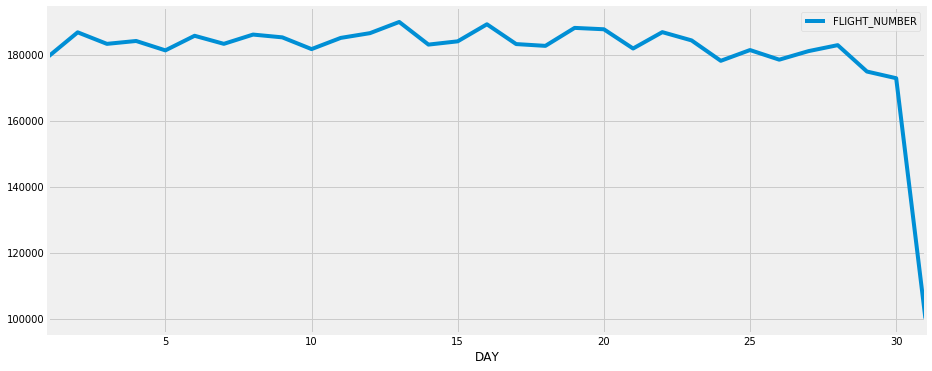

In [55]:
flights3[['DAY', 'ARRIVAL_DELAY']].groupby('DAY').mean().plot(figsize=(14,6))
flights3[['DAY', 'FLIGHT_NUMBER']].groupby('DAY').count().plot(figsize=(14,6));

#### the difference is not that big between months, probably ramdom

### The Airlines might have some influence

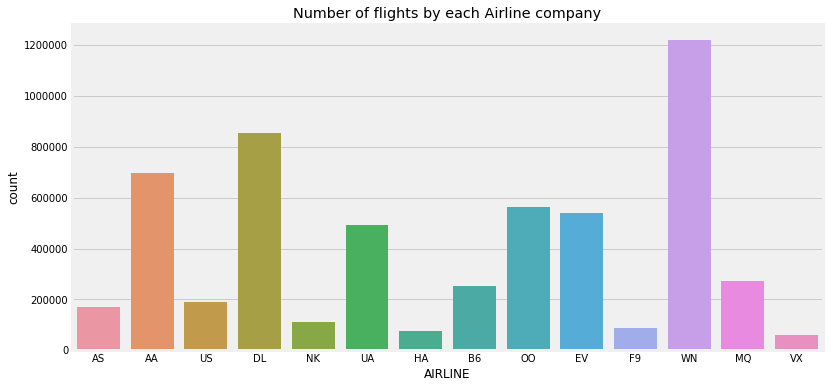

In [56]:
plt.figure(figsize=(12,6))
sns.countplot(flights3['AIRLINE'])
plt.title('Number of flights by each Airline company');

In [57]:
flights3[['AIRLINE', 'ARRIVAL_DELAY']].groupby('AIRLINE').mean().sort_values(by='ARRIVAL_DELAY', ascending=False)

,ARRIVAL_DELAY
AIRLINE,
NK,7.663669
F9,4.981176
OO,1.718045
EV,1.678614
B6,1.676614
WN,1.503115
MQ,1.356968
VX,1.272874
US,1.080712


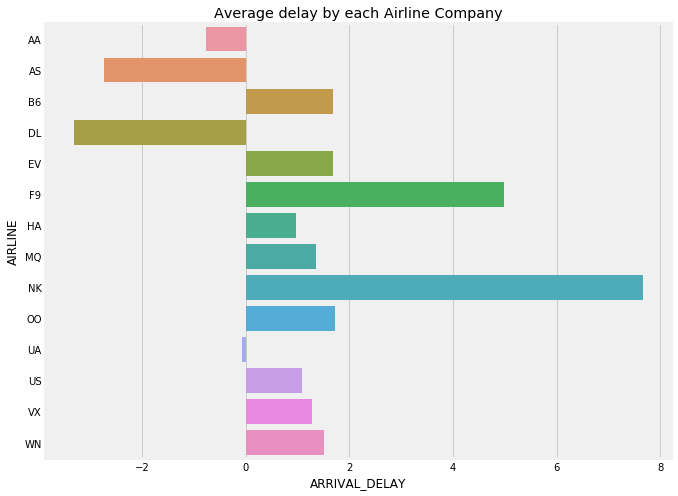

In [58]:
airlines = flights3[['AIRLINE', 'ARRIVAL_DELAY']].groupby('AIRLINE').mean().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(y='AIRLINE', x='ARRIVAL_DELAY', data=airlines)
plt.title('Average delay by each Airline Company');

#### The Airline seems to be a good indication if the flight will arrive delayed

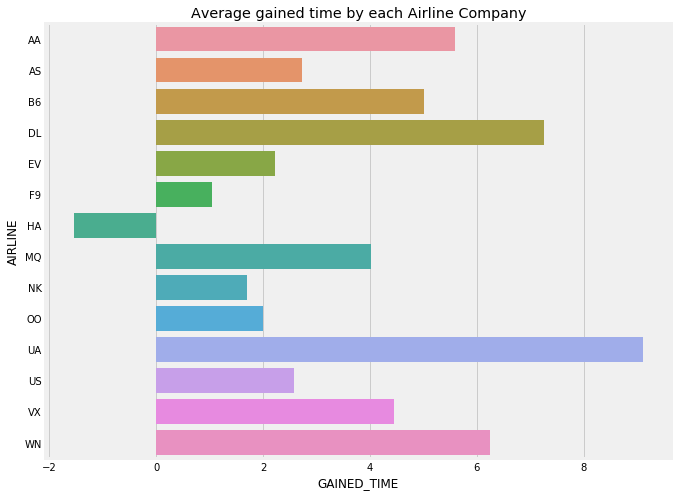

In [59]:
airline_gain = flights3[['AIRLINE', 'GAINED_TIME']].groupby('AIRLINE').mean().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(y='AIRLINE', x='GAINED_TIME', data=airline_gain)
plt.title('Average gained time by each Airline Company');



### The Airport may also influence the delay:

In [60]:
flights3['ORIGIN_AIRPORT'].value_counts()

ATL      337686
ORD      268294
DFW      227481
DEN      189311
LAX      188424
PHX      143557
SFO      142384
IAH      140641
LAS      129412
MSP      109385
SEA      108853
MCO      106490
DTW      104672
BOS      102459
CLT       97412
EWR       95574
SLC       95402
LGA       91731
JFK       89084
BWI       82269
MDW       77132
FLL       70909
DCA       69968
SAN       68219
MIA       66705
PHL       63123
TPA       61597
DAL       57642
HOU       50163
PDX       46147
          ...  
10926         3
14543         3
10268         3
11013         3
10739         3
11617         3
12255         3
10918         3
14109         3
14113         3
15048         3
13127         3
11503         3
15991         3
12343         3
10581         2
11587         2
10333         2
12016         2
10170         2
12177         2
14025         1
12265         1
11905         1
13502         1
13459         1
11097         1
15497         1
11503         1
14222         1
Name: ORIGIN_AIRPORT, Le

In [61]:
airports.shape

(322, 7)

### We have 929 different airports in the origin airport but on our airports table we only have 322 airports. I have no explanation for this

In [62]:
flights3[['ORIGIN_AIRPORT', 'ARRIVAL_DELAY']].groupby('ORIGIN_AIRPORT').mean().sort_values(by='ARRIVAL_DELAY', ascending=False)

,ARRIVAL_DELAY
ORIGIN_AIRPORT,
10581,41.000000
10165,19.555556
14222,18.857143
11097,18.000000
12915,16.888889
GST,16.301370
10279,16.062500
14025,15.250000
12206,14.083333


#### The airports with larger positive or negative delays are airports that are not included in our table

### Working with this amount of different Airports might be a bit more difficult, its hard to plot a graph with so many different airports

### If we are going to use a prediction model this also might represent a problem, we will need 930 columns just to represent each origin airport, that will not work well with some models

## Let's join the information from the airports table into the flights table

In [63]:
flights3.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,TAXI_OUT,DISTANCE,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,GAINED_TIME,departure_time,departure_hour,arrival_time,arrival_hour
0,1,1,4,AS,98,N407AS,ANC,SEA,5,-11.0,21.0,1448,4.0,430,-22.0,11.0,2018-02-28 00:05:00,0,2018-02-28 04:30:00,4
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,-8.0,12.0,2330,4.0,750,-9.0,1.0,2018-02-28 00:10:00,0,2018-02-28 07:50:00,7
2,1,1,4,US,840,N171US,SFO,CLT,20,-2.0,16.0,2296,11.0,806,5.0,-7.0,2018-02-28 00:20:00,0,2018-02-28 08:06:00,8
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,-5.0,15.0,2342,8.0,805,-9.0,4.0,2018-02-28 00:20:00,0,2018-02-28 08:05:00,8
4,1,1,4,AS,135,N527AS,SEA,ANC,25,-1.0,11.0,1448,5.0,320,-21.0,20.0,2018-02-28 00:25:00,0,2018-02-28 03:20:00,3


In [64]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [65]:
flights3.rename(columns={'ORIGIN_AIRPORT':'IATA_CODE'}, inplace=True)

## Joining the information about the origin airport:

In [66]:
new = flights3.merge(airports[['AIRPORT', 'STATE', 'IATA_CODE']], how='left', on='IATA_CODE')

In [67]:
new.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,IATA_CODE,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,...,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,GAINED_TIME,departure_time,departure_hour,arrival_time,arrival_hour,AIRPORT,STATE
0,1,1,4,AS,98,N407AS,ANC,SEA,5,-11.0,...,4.0,430,-22.0,11.0,2018-02-28 00:05:00,0,2018-02-28 04:30:00,4,Ted Stevens Anchorage International Airport,AK
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,-8.0,...,4.0,750,-9.0,1.0,2018-02-28 00:10:00,0,2018-02-28 07:50:00,7,Los Angeles International Airport,CA
2,1,1,4,US,840,N171US,SFO,CLT,20,-2.0,...,11.0,806,5.0,-7.0,2018-02-28 00:20:00,0,2018-02-28 08:06:00,8,San Francisco International Airport,CA
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,-5.0,...,8.0,805,-9.0,4.0,2018-02-28 00:20:00,0,2018-02-28 08:05:00,8,Los Angeles International Airport,CA
4,1,1,4,AS,135,N527AS,SEA,ANC,25,-1.0,...,5.0,320,-21.0,20.0,2018-02-28 00:25:00,0,2018-02-28 03:20:00,3,Seattle-Tacoma International Airport,WA


In [68]:
new.rename(columns={'IATA_CODE':'ORIGIN_IATA', 'AIRPORT': 'ORIGIN_AIRPORT', 'STATE': 'ORIGIN_STATE'}, inplace=True)

## Joining the information about the destination airport:

In [69]:
new.rename(columns={'DESTINATION_AIRPORT':'IATA_CODE'}, inplace=True)

flights4 = new.merge(airports[['AIRPORT', 'STATE', 'IATA_CODE']], how='left', on='IATA_CODE')

flights4.rename(columns={'IATA_CODE':'DESTINATION_IATA', 'AIRPORT': 'DESTINATION_AIRPORT', 
                         'STATE': 'DESTINATION_STATE'}, inplace=True)

In [70]:
flights4.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_IATA,DESTINATION_IATA,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,...,ARRIVAL_DELAY,GAINED_TIME,departure_time,departure_hour,arrival_time,arrival_hour,ORIGIN_AIRPORT,ORIGIN_STATE,DESTINATION_AIRPORT,DESTINATION_STATE
0,1,1,4,AS,98,N407AS,ANC,SEA,5,-11.0,...,-22.0,11.0,2018-02-28 00:05:00,0,2018-02-28 04:30:00,4,Ted Stevens Anchorage International Airport,AK,Seattle-Tacoma International Airport,WA
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,-8.0,...,-9.0,1.0,2018-02-28 00:10:00,0,2018-02-28 07:50:00,7,Los Angeles International Airport,CA,Palm Beach International Airport,FL
2,1,1,4,US,840,N171US,SFO,CLT,20,-2.0,...,5.0,-7.0,2018-02-28 00:20:00,0,2018-02-28 08:06:00,8,San Francisco International Airport,CA,Charlotte Douglas International Airport,NC
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,-5.0,...,-9.0,4.0,2018-02-28 00:20:00,0,2018-02-28 08:05:00,8,Los Angeles International Airport,CA,Miami International Airport,FL
4,1,1,4,AS,135,N527AS,SEA,ANC,25,-1.0,...,-21.0,20.0,2018-02-28 00:25:00,0,2018-02-28 03:20:00,3,Seattle-Tacoma International Airport,WA,Ted Stevens Anchorage International Airport,AK


### With this joins we should have some missing data about those airport codes that apperared on flights but not on airports table:

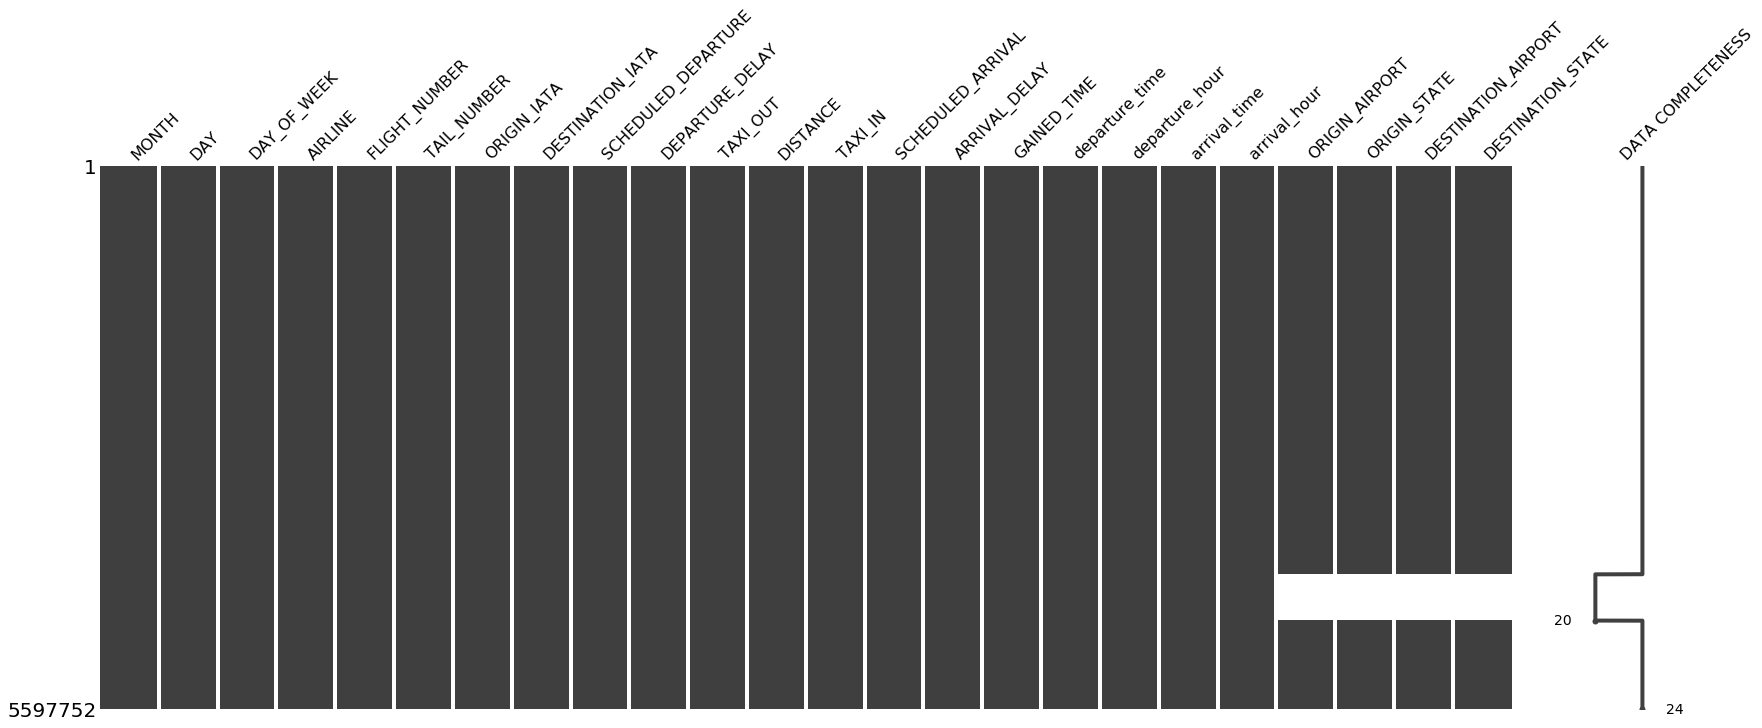

In [71]:
msno.matrix(flights4, labels=True)

#### Interesting, the missing data its all joined together, it looks like we are missing the data from a specific time frame

In [72]:
flights4[flights4['ORIGIN_STATE'].isnull()]['MONTH'].value_counts()

10    477189
Name: MONTH, dtype: int64

In [73]:
flights4[flights4['ORIGIN_STATE'].notnull()]['MONTH'].value_counts()

7     502527
8     493342
3     482502
5     479110
6     477710
4     471041
12    457553
9     456718
11    455047
1     447626
2     397387
Name: MONTH, dtype: int64

### We are missing the data from the month 10, and only from that month

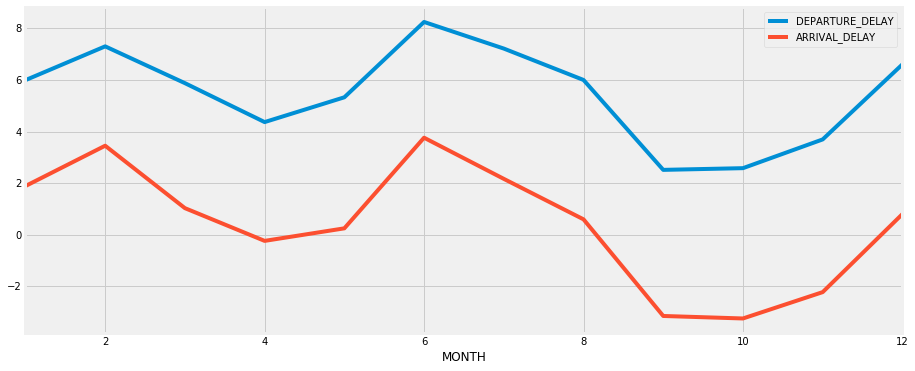

In [74]:
flights4[['MONTH', 'DEPARTURE_DELAY','ARRIVAL_DELAY']].groupby('MONTH').mean().plot(figsize=(14,6))

#### The month 10 is also the month with the lowest average depart delay and arrival delay. If we drop this data we are going to see an increase in the average delays of the dataset. 

#### But we can't analyse the airports if we dont have that information

### Checking if we have many flights inside the same state or if they are more interstate flights

In [75]:
flights4['different_state'] = flights4.apply(lambda row: 'y' if (row['ORIGIN_STATE'] != row['DESTINATION_STATE']) else 'n', axis=1)

In [76]:
flights4[['different_state', 'MONTH', 'FLIGHT_NUMBER']].groupby(['MONTH', 'different_state']).count()

FLIGHT_NUMBER
MONTH different_state               
1     n                        55040
      y                       392586
2     n                        48990
      y                       348397
3     n                        54381
      y                       428121
4     n                        52039
      y                       419002
5     n                        51902
      y                       427208
6     n                        51567
      y                       426143
7     n                        53110
      y                       449417
8     n                        53002
      y                       440340
9     n                        50772
      y                       405946
10    y                       477189
11    n                        49232
      y                       405815
12    n                        48268
      y                       409285

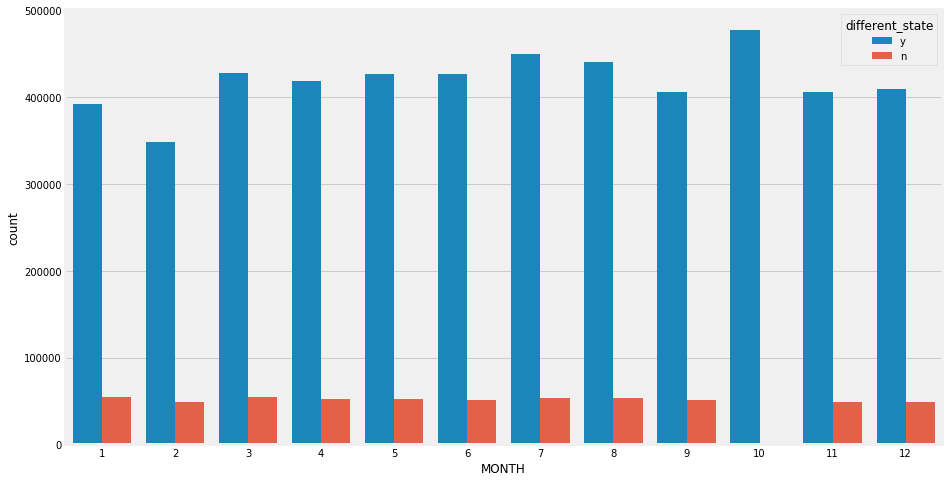

In [77]:
plt.figure(figsize=(14,8))
sns.countplot(x='MONTH', hue='different_state', data=flights4);

In [78]:
state = flights4[['different_state', 'MONTH', 'ARRIVAL_DELAY']].groupby(['MONTH', 'different_state']).mean().reset_index()
state

,MONTH,different_state,ARRIVAL_DELAY
0,1,n,3.306323
1,1,y,1.688076
2,2,n,3.480955
3,2,y,3.445291
4,3,n,3.218367
5,3,y,0.753768
6,4,n,1.731644
7,4,y,-0.481592
8,5,n,4.025086
9,5,y,-0.209881


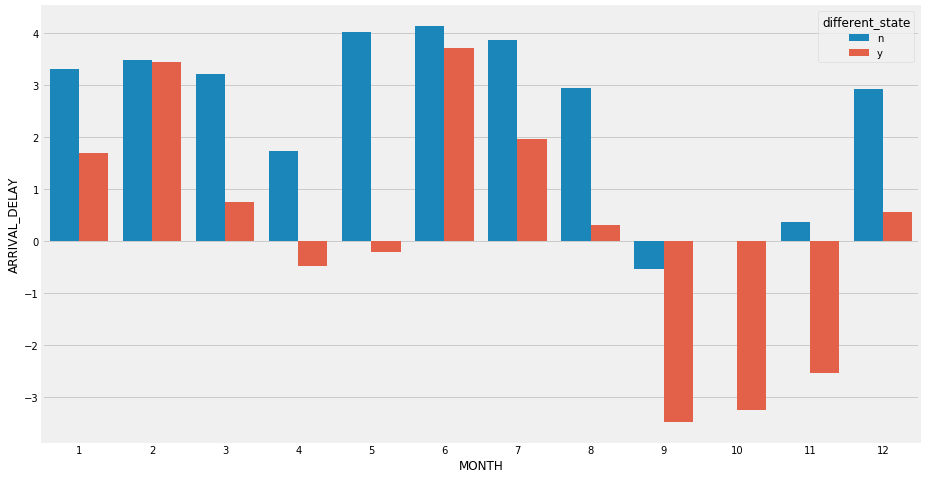

In [79]:
plt.figure(figsize=(14,8))
sns.barplot(x='MONTH', y='ARRIVAL_DELAY', hue='different_state', data=state);

In [80]:
flights4[['different_state', 'ARRIVAL_DELAY']].groupby('different_state').median()

,ARRIVAL_DELAY
different_state,
n,-3.0
y,-6.0


In [81]:
flights4[['different_state', 'ARRIVAL_DELAY']].groupby('different_state').mean()

,ARRIVAL_DELAY
different_state,
n,2.694256
y,0.147121


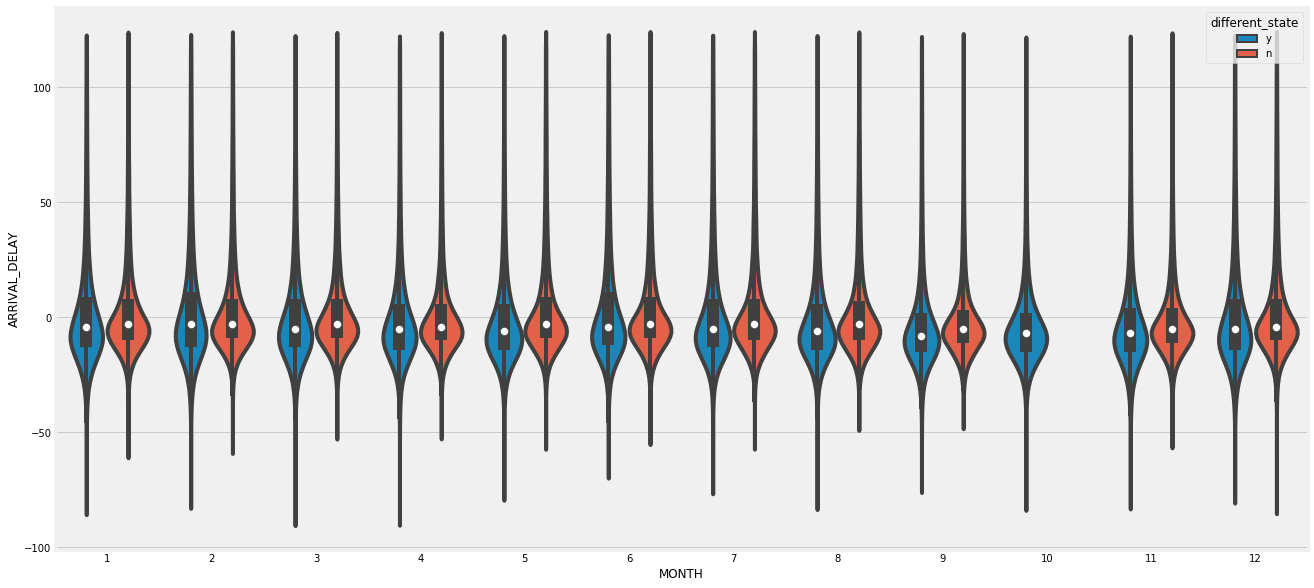

In [82]:
plt.figure(figsize=(20,10))
sns.violinplot(x='MONTH', y='ARRIVAL_DELAY', hue='different_state', data=flights4)

#### The flights inside the same state are about 10% of the total flights

#### The fights inside the same state have a average and median delay superior to the interstate flights, that happens in every month

### Does the same happens with the departure delays?

In [83]:
state = flights4[['different_state', 'MONTH', 'DEPARTURE_DELAY']].groupby(['MONTH', 'different_state']).mean().reset_index()
state

,MONTH,different_state,DEPARTURE_DELAY
0,1,n,4.607594
1,1,y,6.184324
2,2,n,4.727740
3,2,y,7.660832
4,3,n,4.777128
5,3,y,6.013723
6,4,n,3.661792
7,4,y,4.452707
8,5,n,5.627240
9,5,y,5.289189


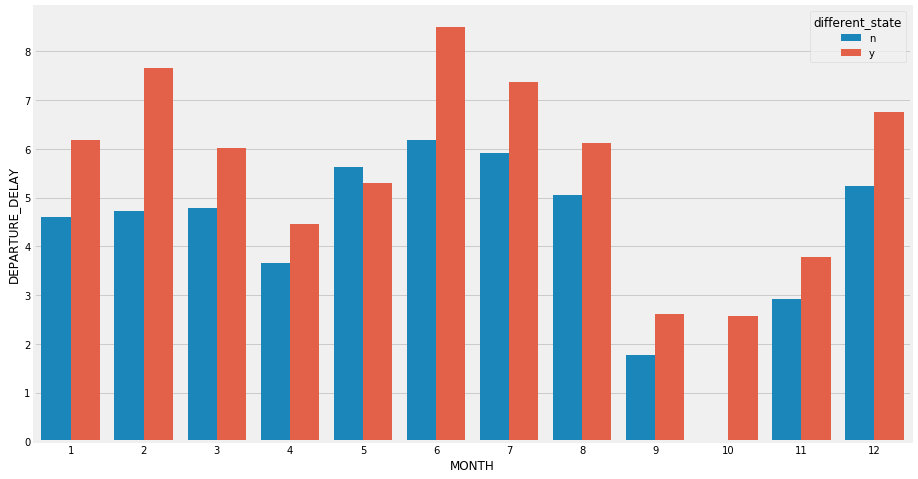

In [84]:
plt.figure(figsize=(14,8))
sns.barplot(x='MONTH', y='DEPARTURE_DELAY', hue='different_state', data=state);

In [85]:
flights4[['different_state', 'DEPARTURE_DELAY']].groupby('different_state').mean()

,DEPARTURE_DELAY
different_state,
n,4.599157
y,5.569977


In [86]:
flights4[['different_state', 'DEPARTURE_DELAY']].groupby('different_state').median()

,DEPARTURE_DELAY
different_state,
n,-2.0
y,-2.0


#### In the Departure delays the situation is different, we can see than on average the delay is bigger on the interstate flights, but not for much

### We have larger departure delays and smaler arrival delays on interstate flights, that probably means they are recovering the difference during the flight, we can check the gained time:

In [87]:
flights4[['different_state', 'GAINED_TIME']].groupby('different_state').mean()

,GAINED_TIME
different_state,
n,1.904901
y,5.422856


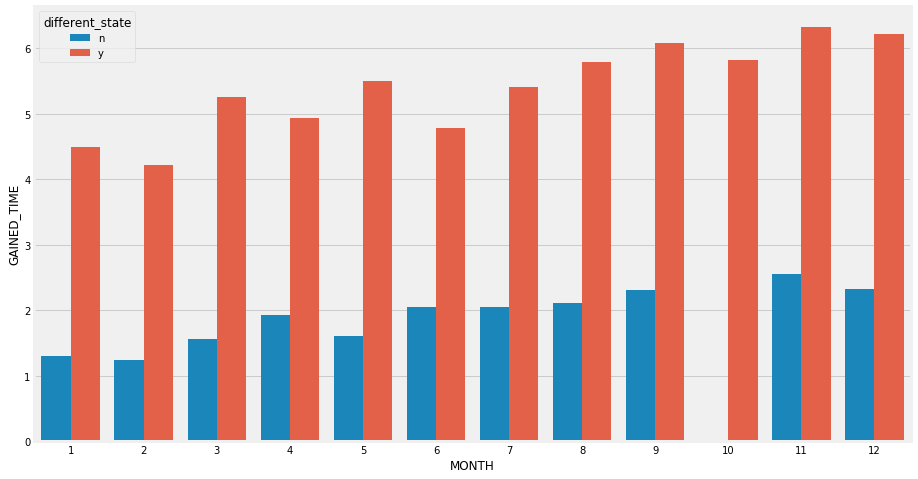

In [88]:
state = flights4[['different_state', 'MONTH', 'GAINED_TIME']].groupby(['MONTH', 'different_state']).mean().reset_index()
plt.figure(figsize=(14,8))
sns.barplot(x='MONTH', y='GAINED_TIME', hue='different_state', data=state);

#### That is the reason, they save more time in interstate flights, thats why the arrival delay is lower for those flights

## Lets see what we can discover analysing the states:

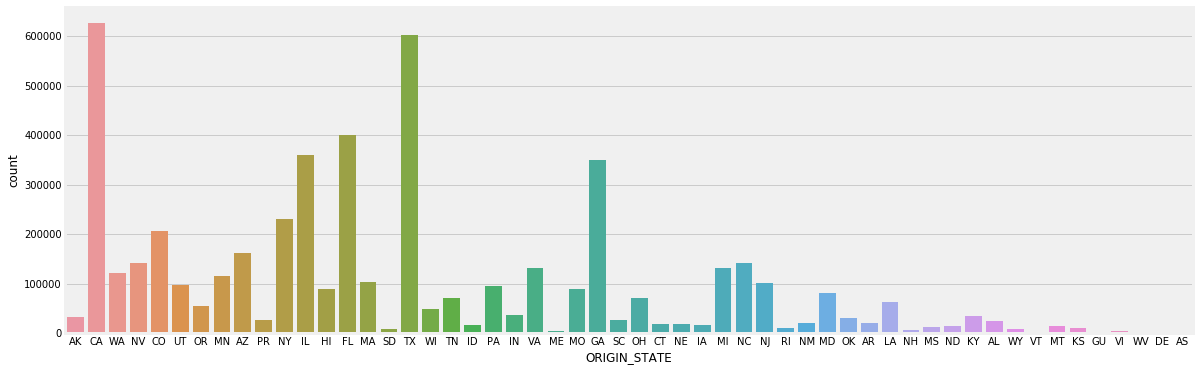

In [89]:
plt.figure(figsize=(18,6))
sns.countplot(flights4['ORIGIN_STATE'])

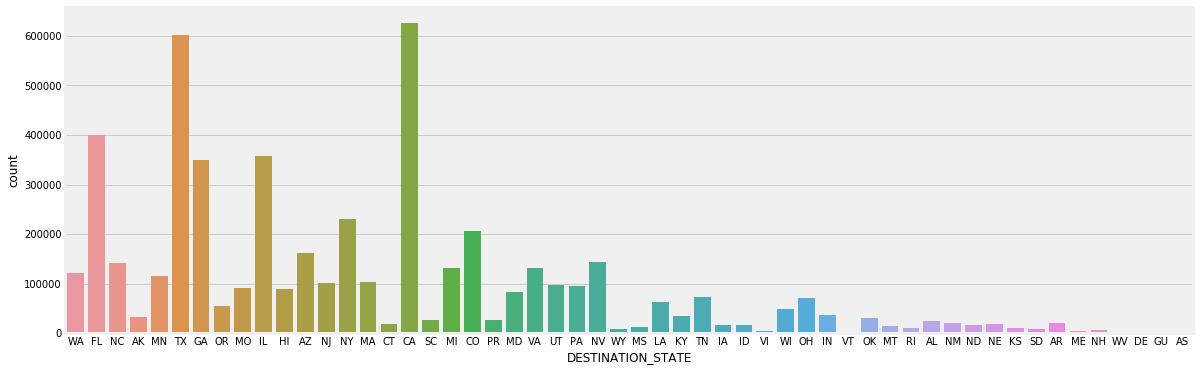

In [90]:
plt.figure(figsize=(18,6))
sns.countplot(flights4['DESTINATION_STATE'])

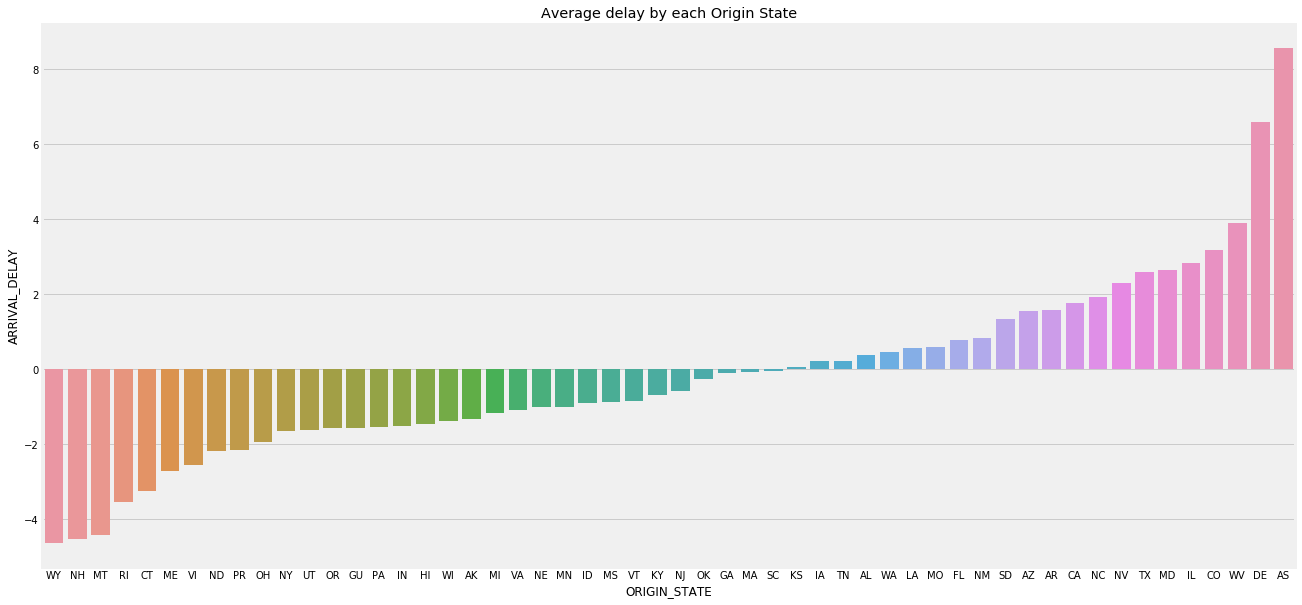

In [91]:
origin = flights4[['ORIGIN_STATE', 'ARRIVAL_DELAY']].groupby('ORIGIN_STATE').mean().reset_index().sort_values(by='ARRIVAL_DELAY')
plt.figure(figsize=(20,10))
sns.barplot(x='ORIGIN_STATE', y='ARRIVAL_DELAY', data=origin)
plt.title('Average delay by each Origin State');

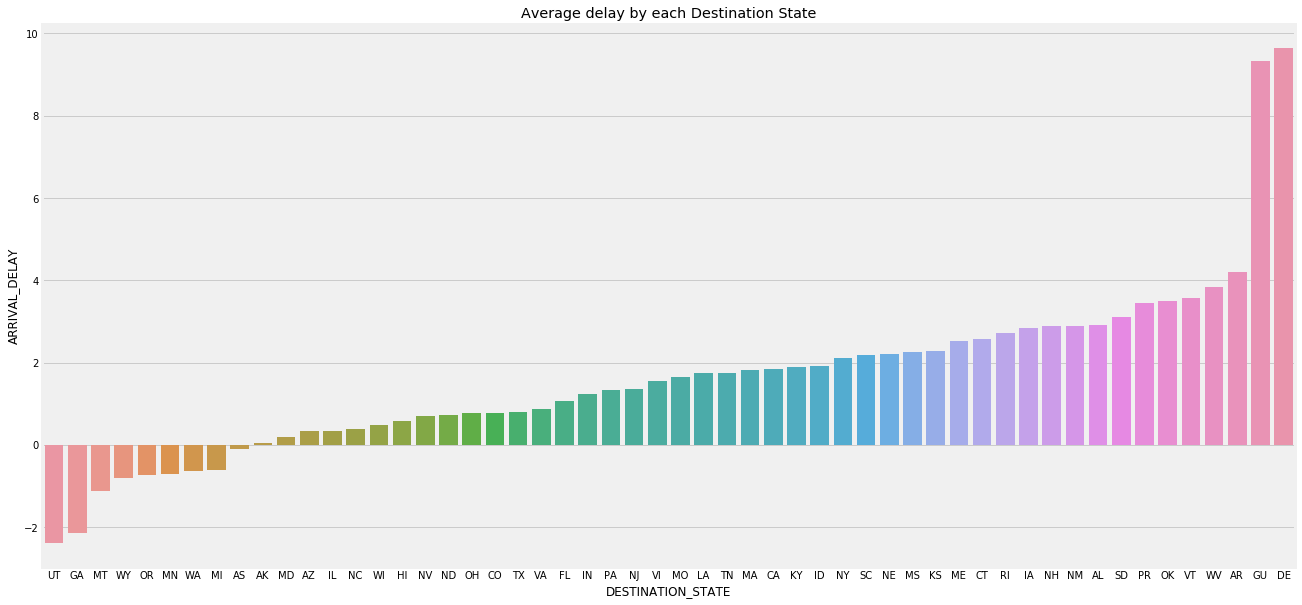

In [92]:
origin = flights4[['DESTINATION_STATE', 'ARRIVAL_DELAY']].groupby('DESTINATION_STATE').mean().reset_index().sort_values(by='ARRIVAL_DELAY')
plt.figure(figsize=(20,10))
sns.barplot(x='DESTINATION_STATE', y='ARRIVAL_DELAY', data=origin)
plt.title('Average delay by each Destination State');

#### There can be big differences of delays depending of the origin and/or destination state

## Let's try to look at the relations between states, airlines and delays

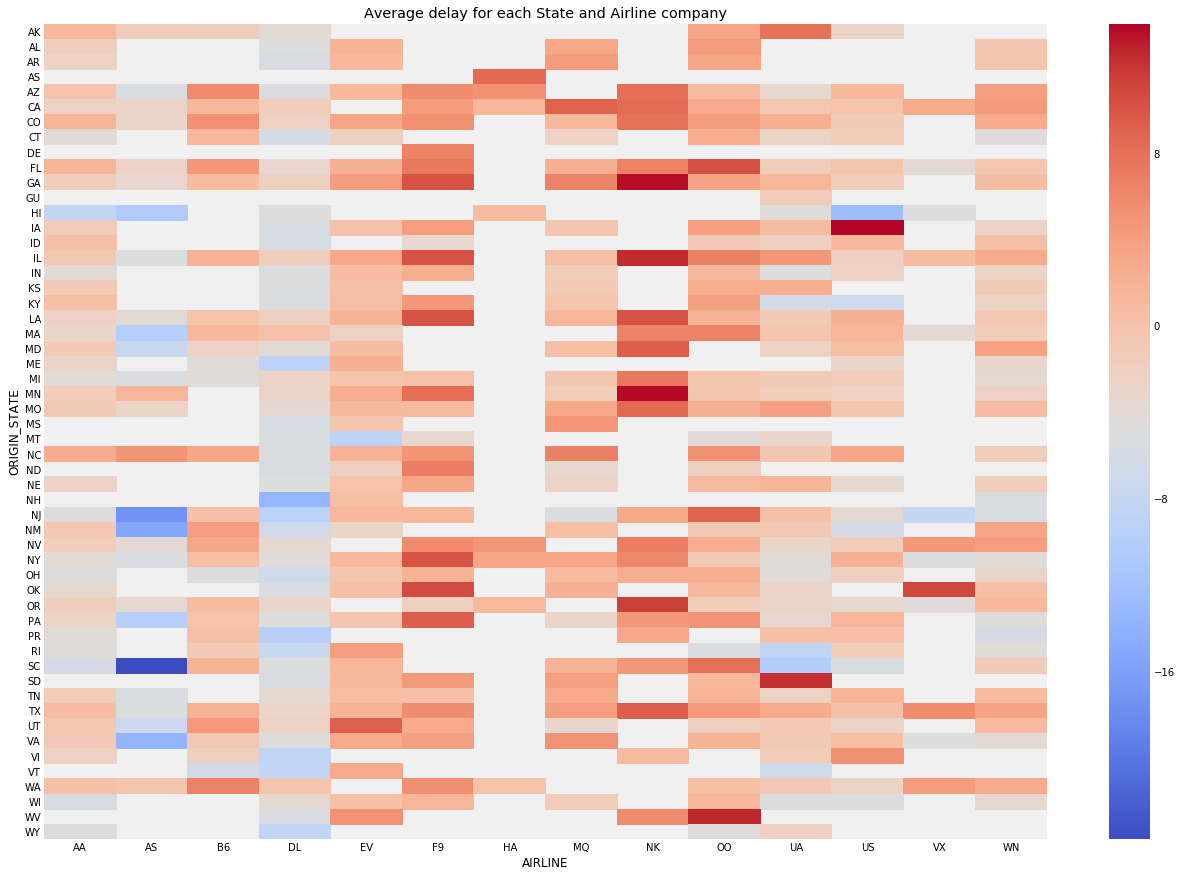

In [93]:
maps = flights4.pivot_table(index='ORIGIN_STATE', columns='AIRLINE', values='ARRIVAL_DELAY', aggfunc=np.mean)
plt.figure(figsize=(20,15))
sns.heatmap(maps, cmap='coolwarm')
plt.title('Average delay for each State and Airline company');

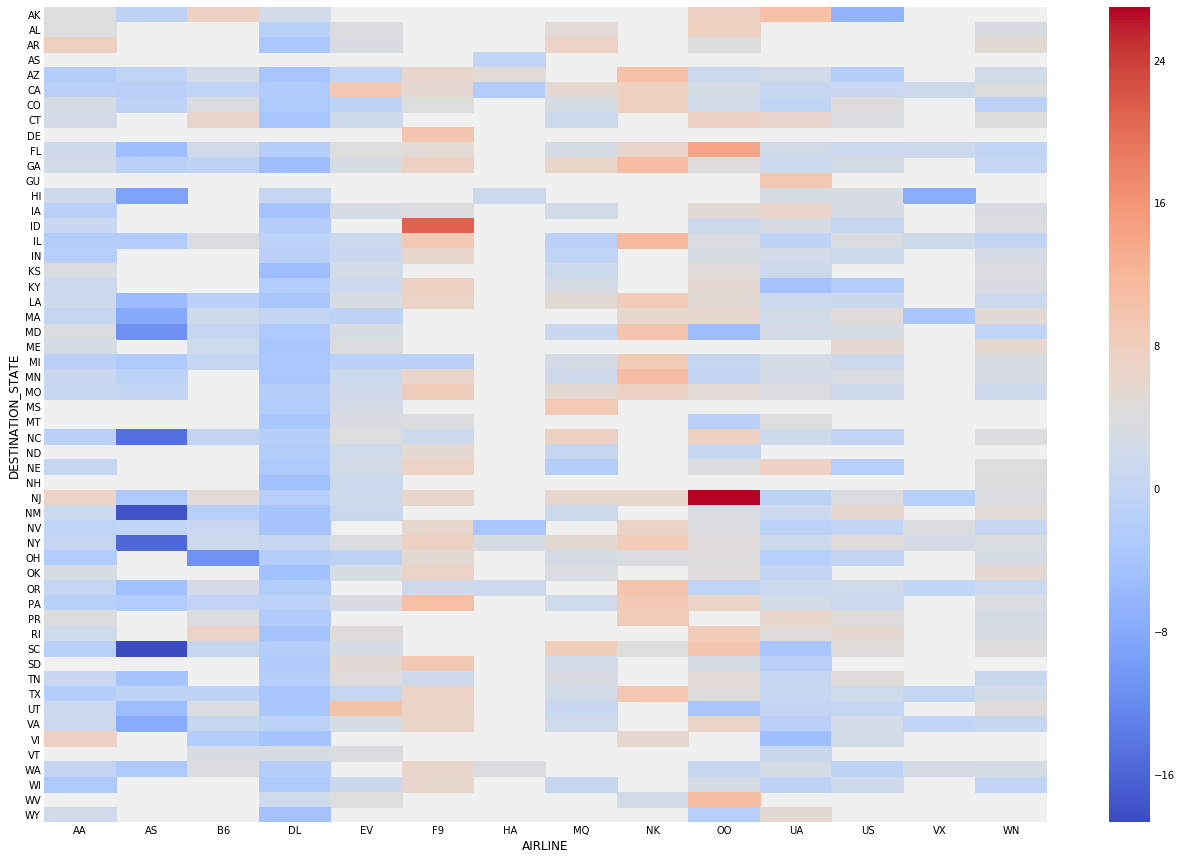

In [94]:
maps = flights4.pivot_table(index='DESTINATION_STATE', columns='AIRLINE', values='ARRIVAL_DELAY', aggfunc=np.mean)
plt.figure(figsize=(20,15))
sns.heatmap(maps, cmap='coolwarm')

### There are some Airlines that consistently perform better, or worse, in almost every state, seems like that the Airline you take influences a lot more that the State you are travelling from or for

## Heatmap of Origin state, destination state and delay:

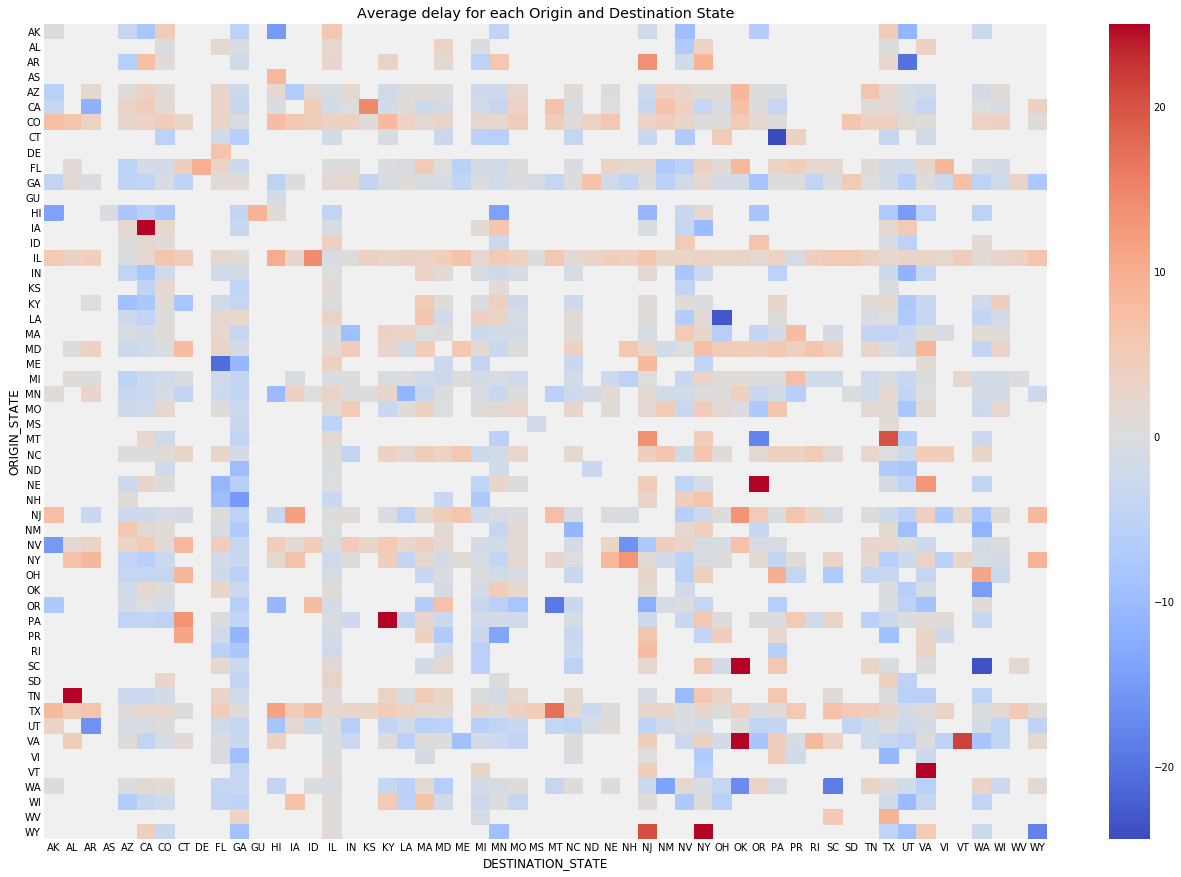

In [95]:
maps = flights4.pivot_table(index='ORIGIN_STATE', columns='DESTINATION_STATE', values='ARRIVAL_DELAY', aggfunc=np.mean)
plt.figure(figsize=(20,15))
sns.heatmap(maps, cmap='coolwarm', vmax=25)
plt.title('Average delay for each Origin and Destination State');

## Back to Airports, there are too many to represent them all but maybe we can classify them in different sizes?

### Will need to ignore the flights during October since we dont have correct data of the airport for that month

In [96]:
flights5 = flights4[flights4['ORIGIN_AIRPORT'].notnull()]

In [97]:
flights5.shape

(5120563, 25)

### Classifying in 5 different classes based on size:

In [98]:
aiport_flights = flights5[['ORIGIN_IATA', 'FLIGHT_NUMBER']].groupby('ORIGIN_IATA').count().reset_index()
aiport_flights.head()

,ORIGIN_IATA,FLIGHT_NUMBER
0,ABE,2165
1,ABI,2176
2,ABQ,18597
3,ABR,645
4,ABY,843


In [99]:
aiport_flights['airport_size'] = pd.cut(aiport_flights['FLIGHT_NUMBER'].values, 5, labels=['xs','s', 'm', 'l', 'xl'])

In [100]:
new = flights5.merge(aiport_flights[['ORIGIN_IATA', 'airport_size']], how='left', on='ORIGIN_IATA')

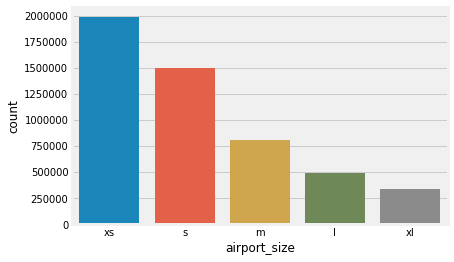

In [101]:
sns.countplot(new['airport_size'])

In [102]:
new[new['airport_size'] == 'xl']['ORIGIN_IATA'].value_counts()

ATL    337686
Name: ORIGIN_IATA, dtype: int64

#### This has one problem, is only classifying 1 airport as large, better try another way

### I am going to calculate the log of the number of flights and classify the airports based on that number, should give us a more balanced division

In [103]:
aiport_flights['log_flights'] = np.log(aiport_flights['FLIGHT_NUMBER'].values)

In [104]:
aiport_flights['airport_size'] = pd.cut(aiport_flights['log_flights'].values, 5, labels=['xs','s', 'm', 'l', 'xl'])
aiport_flights.head()

,ORIGIN_IATA,FLIGHT_NUMBER,airport_size,log_flights
0,ABE,2165,m,7.680176
1,ABI,2176,m,7.685244
2,ABQ,18597,l,9.830756
3,ABR,645,s,6.469250
4,ABY,843,s,6.736967


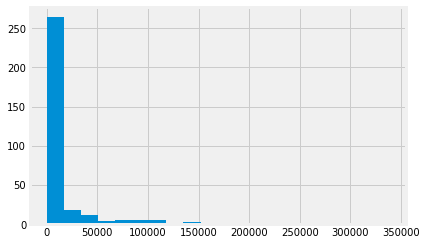

In [105]:
aiport_flights['FLIGHT_NUMBER'].hist(bins=20)

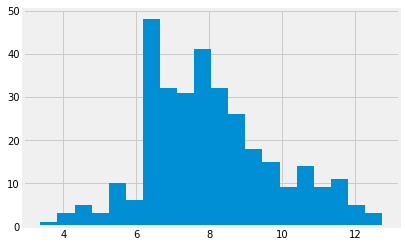

In [106]:
aiport_flights['log_flights'].hist(bins=20)

#### as we can see the log transformed the distribuition of the number of flights, concentrated around small numbers, into a distribuition similar to a normal distribuition. Its always better do deal with a normal distribuition

In [107]:
new = flights5.merge(aiport_flights[['ORIGIN_IATA', 'airport_size']], how='left', on='ORIGIN_IATA')

In [108]:
new[new['airport_size'] == 'xl']['ORIGIN_IATA'].value_counts()

ATL    337686
ORD    268294
DFW    227481
DEN    189311
LAX    188424
PHX    143557
SFO    142384
IAH    140641
LAS    129412
MSP    109385
SEA    108853
MCO    106490
DTW    104672
BOS    102459
CLT     97412
EWR     95574
SLC     95402
LGA     91731
JFK     89084
BWI     82269
MDW     77132
FLL     70909
DCA     69968
SAN     68219
MIA     66705
PHL     63123
TPA     61597
DAL     57642
Name: ORIGIN_IATA, dtype: int64

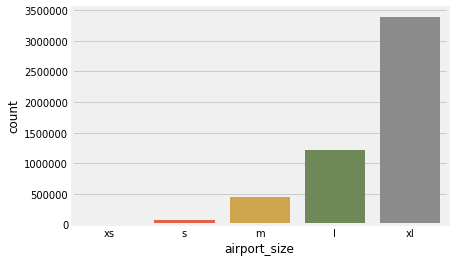

In [109]:
sns.countplot(new['airport_size'])
plt.title

#### the number of flights in larger airports are a lot bigger, as expected

In [119]:
size = new[['airport_size', 'DEPARTURE_DELAY']].groupby('airport_size').mean().reset_index()
size

,airport_size,DEPARTURE_DELAY
0,xs,7.598375
1,s,0.617372
2,m,2.273120
3,l,4.344368
4,xl,6.800133


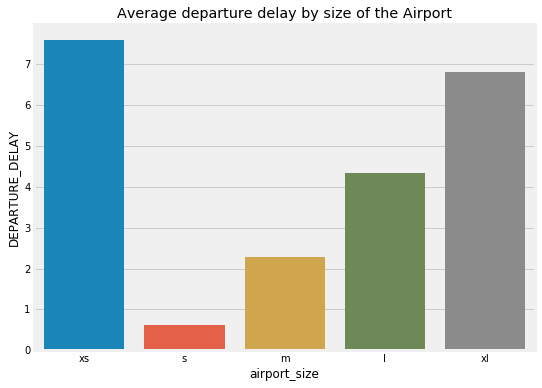

In [121]:
plt.figure(figsize=(8,6))
sns.barplot(x='airport_size', y='DEPARTURE_DELAY', data=size)
plt.title('Average departure delay by size of the Airport');

### The delays are bigger in very small and very large airports, the first ones probably lack resources to avoid delays and the larger ones are very busy all the time

In [112]:
size = new[['airport_size', 'TAXI_OUT']].groupby('airport_size').mean().reset_index()
size

,airport_size,TAXI_OUT
0,xs,12.063177
1,s,13.119896
2,m,13.848721
3,l,12.782645
4,xl,17.454487


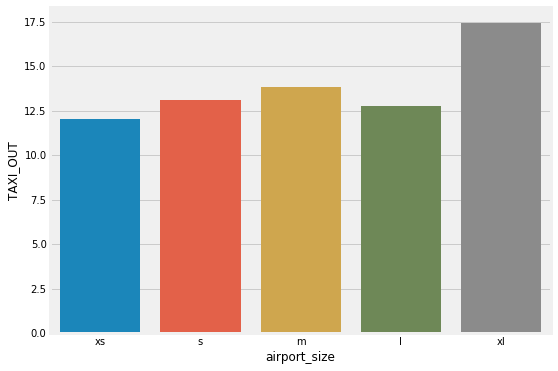

In [113]:
plt.figure(figsize=(8,6))
sns.barplot(x='airport_size', y='TAXI_OUT', data=size)

### In larger airports it also takes more time to take off, this also increases the delays

In [114]:
new.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_IATA', 'DESTINATION_IATA', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_DELAY', 'GAINED_TIME', 'departure_time',
       'departure_hour', 'arrival_time', 'arrival_hour', 'ORIGIN_AIRPORT',
       'ORIGIN_STATE', 'DESTINATION_AIRPORT', 'DESTINATION_STATE',
       'different_state', 'airport_size'],
      dtype='object')

In [115]:
col_ignore = ['FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_IATA', 'DESTINATION_IATA', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 
              'TAXI_OUT', 'DISTANCE', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'GAINED_TIME', 'departure_time', 'arrival_time', 
              'ORIGIN_AIRPORT','DESTINATION_AIRPORT']

In [116]:
flights10 = new.drop(col_ignore, axis=1)

In [117]:
flights10.to_csv('C:/bts_master/Data_Driven/second/final_data.csv')

# Now we can think about predicting delays

## The stronger candidates to be able to predict the delays are:
* Airlines
* Departure hour
* Airport size
* Different state

### We can also try with the remaining variables:
* Month
* Day
* Day of week
* Arrival hour
* States

## This is a prediction made before the flight starts, if you are already flying you can use the departure delay and taxi out. That will give better accuracy but if you are already flying you probably dont need an alogarithm to tell you you are going to arrive late